<a href="https://colab.research.google.com/github/choarauc/form/blob/main/Data_Scientist_en_2021_%F0%9F%A7%A0%F0%9F%93%8A%F0%9F%A4%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Etre Data Scientist en 2021 </h1></center>
<center><h2>Eldorado ou Fléau ? </h2></center>

<hr style="border-width:2px;border-color:#75DFC1">

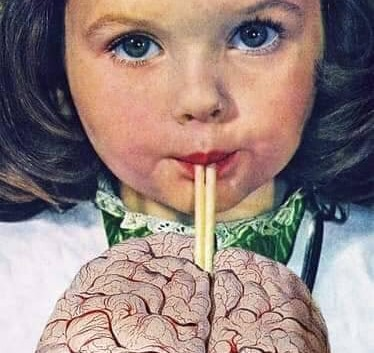

*Il s'agit de la cinquième enquête en ligne Kaggle, et fidèle à sa communauté data, elle nous a donné l'occasion d'explorer et d'en apprendre davantage sur la nature globale, diversifiée et dynamique de l'industrie.*

In [ ]:
#@title
from google.colab import files 
uploaded = files.upload()

Saving kaggle_survey_2021_responses.csv to kaggle_survey_2021_responses.csv


In [ ]:
#@title
!pip install circlify
!pip install venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19716 sha256=f0ab9daa74ec7eb6030d4804685ae0d2fe721493aca53e9695260e36f8418878
  Stored in directory: /root/.cache/pip/wheels/85/8c/61/85a84e4c69c79c6475b9689755fc4ee4dae0bdc32b101011cb
Successfully built venn


In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import circlify
from venn import venn
import gc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title
df = pd.read_csv('kaggle_survey_2021_responses.csv')
df.shape

#25974 participants 

(25974, 369)

In [ ]:
#@title
df = df.iloc[1:,:] 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


# Age

In [ ]:
#@title
blue_colors = ['#189AB4', '#00B5F7','#17BECF','#19D3FE', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_ages = df['Q1'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_ages['index'], y=n_ages['total'], showlegend=False,
    text =n_ages['total'],
     name="Age-groups"), 
     row=1, col=1)
fig.update_yaxes(range=[0,5500])
#fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    shapes=[
        dict(type="rect", xref="x", yref="y",
            x0=-0.5, y0=4000, x1=2.5, y1=5500, line_width=3)
    ])


fig.add_annotation(
        x=2.5,
        y=5000,
        xref="x",
        yref="y",
        text="La tranche d'âge 18-29 ans représente plus de 50% des participants",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="right",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-20,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )


n_agegroup  = n_ages['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_ages['total'],
     labels=n_agegroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Age-groups"),
    row=1, col=2)


fig.update_layout(title_text='Ages des participants', title_x=0.5,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

> * Nous observons que la plupart des participants sont jeunes, suivant le groupe d'âge des 18-29 ans, faut dire que le secteur est à la mode. 
>  
> Bien que le nombre parmi les groupes d'aînés semble faible, cela ne sape en rien leur intérêt pour le sujet. 
>
>> Les entreprises commencent a comprendre la valeur de la data science et embauchent des personnes pour enrichir leurs données et les améliorer.
>> Y compris en interne sur des reconvertions ou en complément de compétences actuelles.

# Genre

In [ ]:
#@title
blue_colors = ['#0099C6','#1CFFCE','rgb(179,226,205)','#E6E6E6']

df_q1_q2 = df.copy()
df_q1_q2 = pd.crosstab(df_q1_q2['Q1'], df_q1_q2['Q2']).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=df_q1_q2['Man'], name = "Man",
                 marker_color = 'rgb(0, 134, 149)', text = df_q1_q2['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Woman'], name = "Woman",
            marker_color = 'orange', text = df_q1_q2['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Nonbinary'], name = "Nonbinary",
            marker_color = '#316395', text = df_q1_q2['Nonbinary'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Prefer not to say'], name = "Prefer not to say",
            marker_color = 'rgb(179, 226, 205)', text = df_q1_q2['Prefer not to say'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q1_q2['Q1'], y=-df_q1_q2['Prefer to self-describe'], name = "Prefer to self-describe",
            marker_color = 'rgb(102,102,102)', text = df_q1_q2['Prefer to self-describe'], textposition = "outside"))
fig.add_annotation(
        x=5.5,
        y=3598,
        xref="x",
        yref="y",
        text="Les participants masculins représentent plus de la moitié de l'enquête",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig.add_shape(type='line',
                x0=-0.5,
                y0=0.31,
                x1=11,
                y1=0.31,
                line=dict(color='black', dash='dot'),
                xref='x',
                yref='paper'
)

fig.update_layout(barmode='relative',
    title_text='👨‍💻👨‍💻',
    height=500, title_x = 0.5, yaxis_title=" ", 
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-2000,4500])

> Nous constatons que plus de la moitié des participants à l'enquête sont des hommes. Mais le nombre de participants d'autres sexes semble prometteur pour les groupes plus jeunes, en particulier pour les 18-21 ans.
>  
> Dans le monde réel, on constate que même si les femmes occupent une grande partie de la communauté de travail, elles manquent encore dans les secteurs techniques, malheuresement. 
> 
> Cependant, on ne sait pas grand-chose des autres sexes. Mais si l'on suit la tendance observée dans cette enquête, on peut dire que les autres genres  deviennent progressivement prédominants dans l'industrie tech. 


# Pays

In [ ]:
#@title
n_country = df['Q3'].value_counts().reset_index(name='total')


blue_colors = ['#19D3F3', '#17BECF', '#0099C6', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

df['Q3'] = np.where((df['Q3'] == 'United States of America'),'USA',df['Q3'])
df['Q3'] = np.where((df['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK & North Ireland',df['Q3'])

n_undisclosed_loc= df.loc[df.Q3 == 'I do not wish to disclose my location', 'Q3'].count()
n_other_loc= df.loc[df.Q3 == 'Other', 'Q3'].count()

df_234 = df[['Q2','Q3','Q4']]
df_234=df_234.rename(columns={'Some college/university study without earning a bachelor’s degree':'Without Bachelor’s degree'})
df_m = df_234[df_234['Q2']=='Man']
df_w = df_234[df_234['Q2']=='Woman']
df_o = df_234[(df_234['Q2'] != 'Man') & (df_234['Q2'] != 'Woman')]

blue_colors = {'Bachelor’s degree':'#0099C6', 'Master’s degree':'#17BECF',
              'Doctoral degree':'#19D3F3', 'I prefer not to answer':'#2ED9FF',
              'High school passout':'#1CFFCE', 'Professional doctorate':'rgb(204, 235, 197)',
              'Higher study w/o bachelor’s': 'rgb(102, 102, 102)'}

# Needs a little modification for some of the country names
df_m['Q3'] = np.where((df_m['Q3'] == 'United States of America'),'USA',df_m['Q3'])
df_m['Q3'] = np.where((df_m['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK',df_m['Q3'])

df_m['Q4'] = np.where((df_m['Q4'] == 'No formal education past high school'),'High school passout',df_m['Q4'])
df_m['Q4'] = np.where((df_m['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_m['Q4'])


df_w['Q3'] = np.where((df_w['Q3'] == 'United States of America'),'USA',df_w['Q3'])
df_w['Q3'] = np.where((df_w['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK',df_w['Q3'])

df_w['Q4'] = np.where((df_w['Q4'] == 'No formal education past high school'),'High school passout',df_w['Q4'])
df_w['Q4'] = np.where((df_w['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_w['Q4'])

df_o['Q3'] = np.where((df_o['Q3'] == 'United States of America'),'USA',df_o['Q3'])
df_o['Q3'] = np.where((df_o['Q3'] == 'United Kingdom of Great Britain and Northern Ireland'),'UK',df_o['Q3'])

df_o['Q4'] = np.where((df_o['Q4'] == 'No formal education past high school'),'High school passout',df_o['Q4'])
df_o['Q4'] = np.where((df_o['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_o['Q4'])

df_o.drop(df_o.index[df_o['Q3'] == 'Other'], inplace = True)
df_o.drop(df_o.index[df_o['Q3'] == 'I do not wish to disclose my location'], inplace = True)

n_country_gen = df_o['Q3'].value_counts().reset_index(name='total')

df_w.drop(df_w.index[df_w['Q3'] == 'Other'], inplace = True)

n_country_female = df_w['Q3'].value_counts().reset_index(name='total')

df_m.drop(df_m.index[df_m['Q3'] == 'Other'], inplace = True)

n_country_male = df_m['Q3'].value_counts().reset_index(name='total')


fig1 = go.Figure(data=[go.Choropleth(locations = n_country['index'],
                                            z = n_country['total'],
                                            zmid = 4000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='All',
                                            colorbar_title = "No. of respondants"),   
                    go.Choropleth(locations = n_country_male['index'],
                                            z = n_country_male['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='Men',
                                            colorbar_title = "No. of male respondants"),
                    go.Choropleth(locations = n_country_female['index'],
                                            z = n_country_female['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='Women',
                                            colorbar_title = "No. of female respondants"),
                    go.Choropleth(locations = n_country_gen['index'],
                                            z = n_country_gen['total'],
                                            zmid = 3000,
                                            locationmode = 'country names',
                                            colorscale = 'Blugrn', name='Other Genders',
                                            colorbar_title = "No. of other respondants")
                ])


fig1.update_layout(
    title_text = 'Participations from each countries for all genders', title_x=0.5, title_y=0.94,
                         geo = dict(showframe = False,
                                    showcoastlines = False,
                                    projection_type = 'equirectangular'),
    annotations = [dict(
        x=0.5,
        y=0,    #Trying a negative number makes the caption disappear - I'd like the caption to be below the map
        xref='paper',
        yref='paper',
        text=" Nombre de participants qui n'ont pas souhaité divulguer <br> leur emplacement: " + str(n_undisclosed_loc) +
           "<br>et qui viennent d'autres pays (non répertoriés) : " + str(n_other_loc),
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=14,
                color="#ffffff"
                ),
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#222A2A",
        opacity=0.8
    )], 
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, False, False, False]}]),
                dict(label="Men",
                     method="update",
                     args=[{"visible": [False, True, False, False]}]),
                dict(label="Women",
                     method="update",
                     args=[{"visible": [False, False, True, False]}]),
                dict(label="Other/Undisclosed Genders",
                     method="update",
                     args=[{"visible": [False, False, False, True]}])
                            ]
                         ))])
fig1.update_layout(
    margin=dict(l=10, r=10, t=10, b=10))  

fig1.show()



df_m_sort = pd.crosstab( index=df_m['Q3'], columns=df_m['Q4'], margins=True, margins_name='Total')
df_m_sort = df_m_sort.sort_values(by='Total', ascending=False).head(11)
df_m_sort = df_m_sort.iloc[1:,:-1]

df_w_sort = pd.crosstab( index=df_w['Q3'], columns=df_w['Q4'], margins=True, margins_name='Total')
df_w_sort = df_w_sort.sort_values(by='Total', ascending=False).head(11)
df_w_sort = df_w_sort.iloc[1:,:-1]

df_o_sort = pd.crosstab( index=df_o['Q3'], columns=df_o['Q4'], margins=True, margins_name='Total')
df_o_sort = df_o_sort.sort_values(by='Total', ascending=False).head(11)
df_o_sort = df_o_sort.iloc[1:,:-1]

fig2 = make_subplots(rows=1, cols=3, specs=[[{"type": "bar"}, {"type": "bar"}, {"type": "bar"}]],
                    subplot_titles=('Gender type 1', 'Gender type 2','Gender type 3'))

for col in df_m_sort.columns:
    fig2.add_trace(go.Bar(x=df_m_sort.index, y=df_m_sort[col], name = col, text=df_m_sort[col], 
                          marker_color=blue_colors[col], textposition = 'outside', showlegend=False), row=1, col=1)
    fig2.add_trace(go.Scatter(x=df_m_sort.index, y=df_m_sort[col], name = col, line = dict(
        color = blue_colors[col],
        width = 0.5), showlegend=False),
              row = 1, col = 1)

for col in df_w_sort.columns:
    fig2.add_trace(go.Bar(x=df_w_sort.index, y=df_w_sort[col], name = col, text=df_w_sort[col],
                          marker_color=blue_colors[col], textposition = 'outside', showlegend=False), row=1, col=2)
    fig2.add_trace(go.Scatter(x=df_w_sort.index, y=df_w_sort[col], name = col, line = dict(
        color = blue_colors[col],
        width = 0.5), showlegend=False),
              row = 1, col = 2)
    
for col in df_o_sort.columns:
    fig2.add_trace(go.Bar(x=df_o_sort.index, y=df_o_sort[col], name = col, text=df_o_sort[col],
                          marker_color=blue_colors[col], textposition = 'outside'), row=1, col=3)
    fig2.add_trace(go.Scatter(x=df_o_sort.index, y=df_o_sort[col], name = col, line = dict(
        color = blue_colors[col],
        width = 0.5),showlegend=False),
              row = 1, col = 3)

names = {'Gender type 1':'Man', 'Gender type 2':'Woman', 'Gender type 3':'Other/Undisclosed gender'}
fig2.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig2.update_layout(
    title_text = 'Top 🔟 des pays ratio 👩‍💻👨‍💻 / 👨‍🎓👩‍🎓 ', title_x=0.5, title_y=0.98,
                 legend=dict(orientation="h", yanchor="bottom", y=1.097, xanchor="center", x=0.5))
fig2.show()

> On voit que la plupart des participants viennent des pays asiatiques. Avec les États-Unis, il semble que ces pays forment la grande majorité des participants de tous les sexes. 
> 
> L'Inde domine clairement les autres pays en nombre de participation. Viennent ensuite les pays européens et l'Australie. Mais les participations des pays d'Afrique, d'Amérique du Sud et du Moyen-Orient semblent bien moindres. Une explication possible pourrait être le manque de connectivité ou l'accès à la technologie, ou cela pourrait être dû à des caractéristiques socio-économiques importantes comme l'éducation formelle, le travail avec l'apprentissage automatique et les compensations annuelles.

# Education

In [ ]:
#@title
blue_colors = ['#0099C6', '#17BECF', '#19D3F3', '#2ED9FF', '#1CFFCE', 'rgb(204, 235, 197)']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_roles = df['Q4'].value_counts().reset_index(name='total')
n_roles= n_roles.replace({'Some college/university study without earning a bachelor’s degree': 'Without Bachelor’s degree'})

fig.add_trace(go.Bar(
     x=n_roles['index'], y=n_roles['total'], showlegend=False, 
    text =n_roles['total'],
     name="Jobs roles"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)
fig.update_yaxes(range=[0,11000])

n_jobcategory  = n_roles['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_roles['total'],
     labels=n_jobcategory, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Job Role"),
    row=1, col=2)

fig.add_annotation(
        x=4,
        y=9000,
        xref="x",
        yref="y",
        text="Most of the participants <br> pursued/are pursuing <br> higher studies",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )


fig.update_layout(title_text='Job roles of the participants', title_x=0.5,title_y=0.97,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5), height=450)
fig.show()

> La plupart des participants poursuivent des études supérieures, ce qui nous amène à nous demander si cela peut expliquer l'énorme participation de la communauté plus jeune. Nous examinons donc nos prochaines données.

In [ ]:
#@title
blue_colors = ['#19D3F3', '#17BECF', '#0099C6', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF','#0DF9F7', '#1CFFCE','rgb(179,226,205)','rgb(204, 235, 197)','#E6E6E6']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_roles = df['Q5'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_roles['index'], y=n_roles['total'], showlegend=False,
    text =n_roles['total'],
     name="Jobs roles"), 
     row=1, col=1)
#fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

fig.add_annotation(
        x=0.6,
        y=6804,
        xref="x",
        yref="y",
        text="Students participated the most in this survey, <br> more than a quarter of the respondants",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )



n_jobcategory  = n_roles['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_roles['total'],
     labels=n_jobcategory, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Job Role"),
    row=1, col=2)

#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Job roles of the participants', title_x=0.5, title_y=0.996,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

df_profession_male = df[df['Q2'] == 'Man'][['Q2', 'Q5']]
df_profession_male = df_profession_male['Q5'].value_counts().rename_axis('Profession').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_profession_male['Gender'] = 'Man'

df_profession_female = df[df['Q2'] == 'Woman'][['Q2', 'Q5']]
df_profession_female = df_profession_female['Q5'].value_counts().rename_axis('Profession').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_profession_female['Gender'] = 'Woman'

df_profession_other = df[(df['Q2'] != 'Man') & (df['Q2'] != 'Woman')][['Q2', 'Q5']]
df_profession_other = df_profession_other['Q5'].value_counts().rename_axis('Profession').reset_index(name='Counts').sort_values(by=['Counts'], ascending=False)
df_profession_other['Gender'] = 'Others'

df_gen_prof = pd.concat([df_profession_male, df_profession_female, df_profession_other], axis=0)
fig1 = px.funnel(df_gen_prof, x='Counts', y='Profession', color='Gender',
                       height=500, title='Profession by gender',
                       category_orders={'Gender': ['Man', 'Woman', 'Others']},
                       color_discrete_sequence=['teal', 'orange', 'lightblue'],
                       )
fig1.update_traces(textposition='inside')
fig1.update_layout(autosize=True,
                         margin=dict(t=110, b=50, l=70, r=40), title_x=0.5, title_y=0.92,
                         plot_bgcolor='white', paper_bgcolor='white', 
                         title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig1.update_layout(
                 margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                        ))

> Comme prévu, la plupart des participants sont des étudiants, composés de plus d'un quart du lot, de tous les sexes.
>  
> Considérant que la plate-forme Kaggle est très utile pour les débutants et les amateurs dans l'apprentissage, la poursuite et l'amélioration de leurs compétences en science des données, il n'est pas étonnant qu'ils forment une grande partie de la cimmunité Kaggle. 
> 
> Suivent de près les Data Scientists/Analysts et les Software Engineers. D'après le graphique, nous voyons que les experts (professionnels) et les débutants participent bien à cette plateforme. Mais la participation de certaines professions semble faire défaut, en particulier celles qui ne sont pas directement liées au domaine ou qui n'ont pas besoin d'autant de codage dans leur travail (par exemple, les statisticiens, les relations avec les développeurs, etc.).
>  
> Peut-être pouvons-nous mieux l'expliquer dans les étapes ultérieures?

# Coding Experience

In [ ]:
#@title
blue_colors = ['#0099C6', '#17BECF', '#19D3F3', '#2ED9FF', '#1CFFCE', 'rgb(204, 235, 197)','#E6E6E6']


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_coding = df['Q6'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_coding['index'], y=n_coding['total'], showlegend=False,
    text =n_coding['total'],
     name="Coding experience"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

fig.update_layout(
    shapes=[
        dict(type="rect", xref="x", yref="y",
            x0=-0.5, y0=5000, x1=1.5, y1=8500, line_width=3),
        dict(type="rect", xref="x", yref="y",
            x0=5.5, y0=900, x1=6.5, y1=1500, line_width=3)
    ])

fig.add_annotation(
        x=3,
        y=7874,
        xref="x",
        yref="y",
        text="La plupart sont débutants et/ou amateurs",
        showarrow=False,
            yshift=10,
        bgcolor="#ffffff",
        opacity=0.8
        )


n_codgroup  = n_coding['index'].values


# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_coding['total'],
     labels=n_codgroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Coding Exp"),
    row=1, col=2)


fig.update_layout(title_text='Coding experiences', title_x=0.5,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                 height=450)
fig.show()

> Encore une fois, nous constatons que plus de 50 % des participants ont une expérience de codage de niveau débutant (ou aucune expérience du tout). Cela pourrait expliquer la participation des jeunes, et AUSSI la participation d'autres membres de la communauté qui pourraient appartenir à d'autres professions et décider d'explorer ce domaine, ou qui souhaitent passer à la science des données à l'avenir.
> 
> Peut-être pouvons-nous vérifier si l'expérience en codage compte davantage ou si les diplômes sont plus importants pour obtenir un emploi ?

In [ ]:
#@title
df_456 = df[['Q4', 'Q5', 'Q6']]
df_456['Q6'] = df_456['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_456['Q6'] = df_456['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_456['Q6'] = df_456['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))
df_456['Q4'] = df_456['Q4'].replace({'Some college/university study without earning a bachelor’s degree': 'Without Bachelor’s degree'})

df_456 = round(pd.crosstab(df_456['Q4'], [df_456['Q5'],df_456['Q6']], normalize='index'), 2).T.reset_index()

df_456_beginner = df_456[df_456['Q6']=='Beginner'].sort_values(by=["Q5"]).reset_index().drop('index', axis=1)
df_456_intermediate = df_456[df_456['Q6']=='Intermediate'].sort_values(by=["Q5"]).reset_index().drop('index', axis=1)
df_456_expert = df_456[df_456['Q6']=='Expert'].sort_values(by=["Q5"]).reset_index().drop('index', axis=1)

fig = make_subplots(rows=1, cols=7, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0)                    
fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Bachelor’s degree'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Bachelor’s degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Bachelor’s degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)



fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Master’s degree'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Master’s degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Master’s degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Doctoral degree'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Doctoral degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Doctoral degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Professional doctorate'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Professional doctorate'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Professional doctorate'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=4)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['I prefer not to answer'], marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['I prefer not to answer'], marker_color='orange', name='Intermediate-level coding experience', 
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['I prefer not to answer'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=5)


fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['Without Bachelor’s degree'],  marker_color='teal', name='Beginner-level coding experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['Without Bachelor’s degree'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['Without Bachelor’s degree'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=6)

fig.add_trace(go.Bar(y=df_456_beginner['Q5'], x=df_456_beginner['No formal education past high school'],  marker_color='teal', name='Beginner-level coding experience',
                     orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_456_intermediate['Q5'], x=df_456_intermediate['No formal education past high school'], marker_color='orange', name='Intermediate-level coding experience',
                     orientation='h', opacity=0.8),
                     row=1, col=7)
fig.add_trace(go.Bar(y=df_456_expert['Q5'], x=df_456_expert['No formal education past high school'], marker_color='rgb(102, 102, 102)', name='Expert-level coding experience',
                     orientation='h', opacity=0.8),
                     row=1, col=7)

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_yaxes(tickmode='array', showline=False, showgrid=False,
                 tickvals=['Business Analyst', 'Currently not employed',
                       'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
                       'Data Scientist', 'Developer Relations/Advocacy',
                       'Machine Learning Engineer', 'Other', 'Product Manager',
                       'Program/Project Manager', 'Research Scientist',
                       'Software Engineer', 'Statistician', 'Student'],
                 ticktext=['Business Analyst', 'Currently not employed',
                       'DBA/Database Engineer', 'Data Analyst', 'Data Engineer',
                       'Data Scientist', 'Developer Relations/Advocacy',
                       'Machine Learning Engineer', 'Other', 'Product Manager',
                       'Program/Project Manager', 'Research Scientist',
                       'Software Engineer', 'Statistician', 'Student'])
fig.update_layout(height=550, 
                  title_text="Degree and Job title based on Coding Experience", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                  margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
                 )


fig['layout']['xaxis'].update(title_text='Bachelor\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis2'].update(title_text='Master\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis3'].update(title_text='Doctoral\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis4'].update(title_text='Professional<br> doctorate', title_font=dict(size=12))
fig['layout']['xaxis5'].update(title_text='Prefer<br> not to<br> answer', title_font=dict(size=12))
fig['layout']['xaxis6'].update(title_text='Without<br> Bachelor\'s<br> degree', title_font=dict(size=12))
fig['layout']['xaxis7'].update(title_text='No formal<br> education<br> past high<br>school', title_font=dict(size=12))



fig.show()

> Pour les professions clés liées à la science des données, nous voyons principalement les codeurs de niveau intermédiaire et expert. 
> 
> Alors que les étudiants et les personnes actuellement au chômage forment également une grande partie de cette catégorie, nous pouvons voir une nette différence dans l'expérience de codage entre les professions qui avaient montré un faible taux de participation. 
> 
> Mais il est intéressant de noter que même les domaines connexes de la science des données ont des professionnels ayant une expérience de codage de niveau débutant.
> 
> Comme nous en avons discuté précédemment, les autres sexes semblent avoir une participation moindre que les hommes dans le monde de la technologie. Est-ce cohérent dans tous les pays du monde ? Vérifions nos données dans l'enquête.

In [ ]:
#@title
dfb = df[df['Q2']=='Man']
dfb = pd.crosstab(dfb['Q3'], dfb['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
dfb = dfb.iloc[1:, :-1]
dfb = dfb.loc(axis=0)[1,2,3,16,7,10,8,6,11,5].reset_index(drop=True)
cm1 = sns.light_palette("teal", as_cmap=True)
dfb.style.background_gradient(axis=1, cmap=cm1)


dfg = df[df['Q2']=='Woman']
dfg = pd.crosstab(dfg['Q3'], dfg['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
dfg = dfg.iloc[1:, :-1]
dfg = dfg.loc(axis=0)[1,2,3,16,7,10,8,6,11,5].reset_index(drop=True)
cm2 = sns.light_palette("#5A9", as_cmap=True)
dfg.style.background_gradient(axis=1, cmap=cm2)


dfo = df[(df['Q2'] != 'Man') & (df['Q2'] != 'Woman')]
dfo = pd.crosstab(dfo['Q3'], dfo['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
dfo = dfo.iloc[1:, :-1]
dfo = dfo.loc(axis=0)[1,2,3,16,7,10,8,6,11,5].reset_index(drop=True)


df_gender_wise = pd.merge(dfb, dfg, left_index=True, right_index=True)
df_gender_wise = pd.merge(df_gender_wise, dfo, left_index=True, right_index=True)
df_gender_wise.drop(['Q3', 'Q3_y'], axis='columns', inplace=True)

df_gender_wise.rename(columns={"1-3 years_x": "1-3 years", 
                               '10-20 years_x': "1-3 years", '20+ years_x': "20+ years", 
                               '3-5 years_x': "3-5 years", '5-10 years_x': "5-10 years", 
                               '< 1 years_x': "< 1 years",  'I have never written code_x': "I have never written code",                             
                               "1-3 years_y": "1-3 years",
                               '10-20 years_y': "1-3 years", '20+ years_y': "20+ years", 
                               '3-5 years_y': "3-5 years", '5-10 years_y': "5-10 years", 
                               '< 1 years_y': "< 1 years", 'I have never written code_y': "I have never written code"
                              }, inplace = True)

df_gender_wise_1 = df_gender_wise.iloc[:, 0]
df_gender_wise_2 = df_gender_wise.iloc[:, 1:]

df_gender_wise_2.columns = pd.MultiIndex.from_product([['Men', 'Women', 'Other Genders'],['1-3 years', '10-20 years', '20+ years', '3-5 years', '5-10 years',
       '< 1 years', 'I have never written code']])

df_gender_wise = pd.concat([df_gender_wise_1, df_gender_wise_2], axis=1)
df_gender_wise = df_gender_wise.rename({'Q3_x' : 'Country'}, axis=1)

cm1 = sns.light_palette("teal", as_cmap=True)
cm2 = sns.light_palette("orange", as_cmap=True)
cm3 = sns.light_palette("lightblue", as_cmap=True)


df_gender_wise.style.background_gradient(cmap=cm1, subset=[('Men', '1-3 years'),
                               ('Men', '10-20 years'),
                                 ('Men', '20+ years'),
                                 ('Men', '3-5 years'),
                                ('Men', '5-10 years'),
                                 ('Men', '< 1 years'),
                 ('Men', 'I have never written code')])\
    .background_gradient(cmap=cm2, subset=[('Women', '1-3 years'),
                             ('Women', '10-20 years'),
                               ('Women', '20+ years'),
                               ('Women', '3-5 years'),
                              ('Women', '5-10 years'),
                               ('Women', '< 1 years'),
               ('Women', 'I have never written code')])\
    .background_gradient(cmap=cm3, subset=[('Other Genders', '1-3 years'),
                     ('Other Genders', '10-20 years'),
                       ('Other Genders', '20+ years'),
                       ('Other Genders', '3-5 years'),
                      ('Other Genders', '5-10 years'),
                       ('Other Genders', '< 1 years'),
       ('Other Genders', 'I have never written code')])\
    .set_caption("Genders and their years of experience in the top 10 countries of participation")\
    .format(precision=2).set_properties(**{
        'width': '20px',
        'max-width': '20px',
        'font-size': '8pt'
    })

,Country,"('Men', '1-3 years')","('Men', '10-20 years')","('Men', '20+ years')","('Men', '3-5 years')","('Men', '5-10 years')","('Men', '< 1 years')","('Men', 'I have never written code')","('Women', '1-3 years')","('Women', '10-20 years')","('Women', '20+ years')","('Women', '3-5 years')","('Women', '5-10 years')","('Women', '< 1 years')","('Women', 'I have never written code')","('Other Genders', '1-3 years')","('Other Genders', '10-20 years')","('Other Genders', '20+ years')","('Other Genders', '3-5 years')","('Other Genders', '5-10 years')","('Other Genders', '< 1 years')","('Other Genders', 'I have never written code')"
0,India,2074,289,92,842,494,1675,214,619,46,10,233,145,537,66,35,8,1,15,8,27,3
1,USA,372,283,392,297,342,195,68,140,60,48,94,81,132,51,19,10,17,15,17,14,3
2,Other,285,91,84,171,138,193,42,65,13,8,51,19,52,19,3,5,9,6,5,8,3
3,France,62,36,48,80,69,28,3,9,8,7,10,7,25,2,0,1,2,1,3,0,0
4,Russia,181,55,53,114,72,143,12,48,1,1,16,7,33,0,1,1,7,3,1,0,0
5,UK & North Ireland,104,53,70,67,74,54,7,22,9,5,8,12,23,2,2,1,0,2,2,1,0
6,Nigeria,228,12,2,73,45,196,38,31,8,3,9,8,37,8,5,0,0,3,0,3,1
7,Brazil,141,83,87,116,107,111,19,41,1,0,7,1,44,13,1,2,4,3,2,4,1
8,Spain,74,53,86,63,60,44,9,26,3,0,17,2,27,6,3,1,1,1,2,0,0
9,China,286,37,11,134,56,142,6,25,9,9,16,15,30,9,5,4,3,4,0,4,1


> Nous voyons la tendance habituelle même à travers ce tableau ci-dessus, et la participation parmi les 10 premiers pays semble montrer un résultat cohérent sur la quantité d'expérience de codage des participants, selon leur sexe. 
> 
> Alors que la plupart des participants montrent un niveau de codage débutant et intermédiaire, pour les 2 premiers pays comme l'Inde et les États-Unis, une bonne partie des participants semblent avoir 10 à 20 ans d'expérience (bien que la plupart d'entre eux soient des participants masculins). 
> 
> Cela ajoute encore à notre analyse précédente - pourrait-il être dû à la facilité de compréhension et de travail avec certains langages de codage ? 
> 
> Parfois, cela peut aider l'utilisateur à apprendre rapidement les bases du langage de codage et à appliquer ses compétences pour l'améliorer davantage.

# Coding languages used vs preferred

In [ ]:
#@title
Q7_values = df.loc[:,['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
       'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9',
       'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']]

blue_colors = ['#19D3F3', '#17BECF', '#0099C6', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=Q7_values.stack().unique(), y=Q7_values.stack().value_counts().values, showlegend=False,
    text =Q7_values.stack().value_counts().values,
     name="Programming language"), 
     row=1, col=1)
#fig.update_layout(uniformtext_minsize=8)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=Q7_values.stack().value_counts().values,
     labels=Q7_values.stack().unique(), pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Programming language"),
    row=1, col=2)


#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Langage de programmation préféré des participants', title_x=0.5, title_y=0.95,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5), height= 350)
fig.show()

blue_colors = ['#0099C6', '#19D3F3', '#17BECF', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig1 = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_recom_coding = df['Q8'].value_counts().reset_index(name='total')

fig1.add_trace(go.Bar(
     x=n_recom_coding['index'], y=n_recom_coding['total'], showlegend=False,
    text =n_recom_coding['total'],
     name="Coding experience"), 
     row=1, col=1)

fig1.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)
fig1.add_trace(go.Scatter(x=n_recom_coding['index'], y=n_recom_coding['total'], showlegend=False, line = dict(
        color = 'red',
        width = 1.5)), row=1, col=1)

fig1.add_annotation(
        x=0.6,
        y=12000,
        xref="x",
        yref="y",
        text=" Téma l'écart <br> entre Python et <br> les autres langages",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )

fig1.add_shape(type='line',
                x0=0.5,
                y0=0,
                x1=0.5,
                y1=1,
                line=dict(color='black', dash='dot'),
                xref='x',
                yref='paper'
)

n_reccodgroup  = n_recom_coding['index'].values

# pull is given as a fraction of the pie radius
fig1.add_trace(go.Pie(
     values=n_recom_coding['total'],
     labels=n_reccodgroup, pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Coding Recom"),
    row=1, col=2)


fig1.update_layout(title_text='Coding recommendations', title_x=0.5, title_y=0.96,
                 legend=dict(orientation="h", yanchor="bottom", y=1.07, xanchor="center", x=0.5),
                 height=350)
fig1.show()

In [ ]:
#@title
df_q6_q7 = df[['Q6',"Q7_Part_1", "Q7_Part_2", "Q7_Part_3",
                                 "Q7_Part_4", "Q7_Part_5", "Q7_Part_6",
                                 "Q7_Part_7", "Q7_Part_8", "Q7_Part_9",
                                 "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q14_OTHER"]]

df_q6_q7['Q6'] = df_q6_q7['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_q6_q7['Q6'] = df_q6_q7['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_q6_q7['Q6'] = df_q6_q7['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))

df_q6_q7 = df_q6_q7.groupby(['Q6'])[["Q7_Part_1", "Q7_Part_2", "Q7_Part_3",
                                 "Q7_Part_4", "Q7_Part_5", "Q7_Part_6",
                                 "Q7_Part_7", "Q7_Part_8", "Q7_Part_9",
                                 "Q7_Part_10", "Q7_Part_11", "Q7_Part_12", "Q14_OTHER"] 
                                 ].count().unstack().fillna(0).reset_index(name='counts')


df_q6_q7_beginner = df_q6_q7[df_q6_q7['Q6'] == 'Beginner'].drop(columns='Q6').sort_values(by='counts', axis=0, ascending=False)
df_q6_q7_intermediate = df_q6_q7[df_q6_q7['Q6'] == 'Intermediate'].drop(columns='Q6').sort_values(by='counts', axis=0, ascending=False)
df_q6_q7_expert = df_q6_q7[df_q6_q7['Q6'] == 'Expert'].drop(columns='Q6').sort_values(by='counts', axis=0, ascending=False)

#df_q6_q7 = df_q6_q7.sort_values(by='counts', ascending = True).tail()
df_q6_q7 = pd.merge(df_q6_q7_beginner, df_q6_q7_intermediate, on='level_0')
df_q6_q7 = pd.merge(df_q6_q7, df_q6_q7_expert, on='level_0')
names = ['Q7', 'Beginner', 'Intermediate', 'Expert']
df_q6_q7.columns = names
df_q6_q7["All"] = df_q6_q7.sum(axis=1)
df_q6_q7 = df_q6_q7.head()

df_q6_q7 = df_q6_q7.replace({'Q7' : 
                                 { 'Q7_Part_1' : 'Python', "Q7_Part_2" : 'R' ,     
                                "Q7_Part_3" : 'SQL', "Q7_Part_4" : 'C',
                                "Q7_Part_5" : 'C++'
                                 }})


data1 = [{'id': 'World', 'datum': df_q6_q7.value_counts().sum(), 'children' : [
              {'id' : df_q6_q7['Q7'].iloc[0], 'datum' : df_q6_q7['All'].iloc[0],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[0]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[0]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[0]}
                   ]},
              {'id' : df_q6_q7['Q7'].iloc[1], 'datum' : df_q6_q7['All'].iloc[1],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[1]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[1]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[1]}
                   ]},
              {'id' : df_q6_q7['Q7'].iloc[2], 'datum' : df_q6_q7['All'].iloc[2],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[2]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[2]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[2]}
                   ]},
              {'id' : df_q6_q7['Q7'].iloc[3], 'datum' : df_q6_q7['All'].iloc[3],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[3]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[3]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[3]}
                               ]},
              {'id' : df_q6_q7['Q7'].iloc[4], 'datum' : df_q6_q7['All'].iloc[4],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q7['Beginner'].iloc[4]},
                     {'id' : "Intermediate", 'datum' : df_q6_q7['Intermediate'].iloc[4]},
                     {'id' : "Expert", 'datum' : df_q6_q7['Expert'].iloc[4]}
                               ]}
    ]}]


circles = circlify.circlify(
    data1, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


child_circle_groups = []
for i in range(len(data1)):
    child_circle_groups.append(circlify.circlify(
        data1, 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=circles[i].x, y=circles[i].y, r=circles[i].r)
    ))

    
fig1 = go.Figure()

fig1.update_xaxes(
    range=[-1.05, 1.05], # making slightly wider axes than -1 to 1 so no edge of circles cut-off
    showticklabels=False,
    showgrid=False,
    zeroline=False
)

fig1.update_yaxes(
    range=[-1.05, 1.05],
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle    
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig1.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="LightSeaGreen",
        line_width=2,
        fillcolor="rgb(179, 226, 205)", 
    )
    fig1.add_annotation(
        x=x,
        y=y,
        xref="x",
        yref="y",showarrow=False, xshift=50, yshift=70,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=1
        )
    fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    
    
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig1.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="LightSeaGreen",
        line_width=2,
        fillcolor="rgb(82, 188, 163)",
    )
    fig1.add_annotation(
        x=x,
        y=y, 
        xref="x", yref="y",showarrow=False,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        opacity=0.8,
        )
    fig1.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', width=500, height=500, plot_bgcolor="white",
                      margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=0, #top margin
                        ), title_text='Top 5 programming languages used regularly', title_x=0.5, title_y=0.998,
                      )
fig1.show()


df_q6_q8 = df[['Q6','Q8']]
df_q6_q8 = df_q6_q8[df_q6_q8.Q8 != 'None']

df_q6_q8['Q6'] = df_q6_q8['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_q6_q8['Q6'] = df_q6_q8['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_q6_q8['Q6'] = df_q6_q8['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Expert'))

df_q6_q8 = pd.crosstab(df_q6_q8['Q8'], df_q6_q8['Q6'], margins=True).reset_index()[:-1].sort_values(by='All', ascending=False).head(5)

data2 = [{'id': 'World', 'datum': df_q6_q8.value_counts().sum(), 'children' : [
              {'id' : df_q6_q8['Q8'].iloc[0], 'datum' : df_q6_q8['All'].iloc[0],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[0]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[0]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[0]}
                   ]},
              {'id' : df_q6_q8['Q8'].iloc[1], 'datum' : df_q6_q8['All'].iloc[1],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[1]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[1]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[1]}
                   ]},
              {'id' : df_q6_q8['Q8'].iloc[2], 'datum' : df_q6_q8['All'].iloc[2],  
                   'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[2]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[2]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[2]}
                   ]},
              {'id' : df_q6_q8['Q8'].iloc[3], 'datum' : df_q6_q8['All'].iloc[3],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[3]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[3]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[3]}
                               ]},
              {'id' : df_q6_q8['Q8'].iloc[4], 'datum' : df_q6_q8['All'].iloc[4],  
                               'children' : [ 
                     {'id' : "Beginner", 'datum' : df_q6_q8['Beginner'].iloc[4]},
                     {'id' : "Intermediate", 'datum' : df_q6_q8['Intermediate'].iloc[4]},
                     {'id' : "Expert", 'datum' : df_q6_q8['Expert'].iloc[4]}
                               ]}
    ]}]


circles = circlify.circlify(
    data2, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)


child_circle_groups = []
for i in range(len(data2)):
    child_circle_groups.append(circlify.circlify(
        data2, 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=circles[i].x, y=circles[i].y, r=circles[i].r)
    ))

    
fig2 = go.Figure()

fig2.update_xaxes(
    range=[-1.05, 1.05], # making slightly wider axes than -1 to 1 so no edge of circles cut-off
    showticklabels=False,
    showgrid=False,
    zeroline=False
)

fig2.update_yaxes(
    range=[-1.05, 1.05],
    showticklabels=False,
    showgrid=False,
    zeroline=False,
)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle    
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig2.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="#d48b06",
        line_width=2,
        fillcolor="#f2cc85", 
    )
    fig2.add_annotation(
        x=x,
        y=y,
        xref="x",
        yref="y",showarrow=False, xshift=-30, yshift=40,
        text= str(label) + ": " + str(value),
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=1
        )
    fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
    
    
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    value = circle.ex['datum']
    fig2.add_shape(type="circle",
        xref="x", yref="y",
        x0=x-r, y0=y-r, x1=x+r, y1=y+r,
        line_color="#d48b06",
        line_width=2,
        fillcolor="#faa60c",
    )
    fig2.add_annotation(
        x=x,
        y=y, 
        xref="x", yref="y",showarrow=False,
        text= str(label) + ": " + str(value) + "\n",
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="black"
            ),
        align="center",
        opacity=0.8,
        )
    fig2.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', width=500, height=500, plot_bgcolor="white",
                      margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=0, #top margin
                        ), title_text='Top 5 programming languages recommended', title_x=0.5, title_y=0.91)
fig2.show()

D'après les graphiques ci-dessus, nous voyons une nette domination de Python sur les autres langages de codage, lorsqu'il s'agit de travailler sur la science des données. Parmi les 5 langages les plus utilisés et choisis par les participants, nous pouvons voir que beaucoup ont travaillé sur divers langages autres que Python, mais n'ont toujours pas montré de préférence pour ces autres langages. Alors que les autres langues représentent une part considérable de l'utilisation quotidienne de certains participants, elles semblent incompatibles avec les langues choisies, même par les codeurs de niveau avancé. Des langages comme SQL, R, C++ et C formaient une plus grande partie des premières années de l'industrie technologique (et pourraient encore l'être), mais peut-être en raison de la simplicité et de la lisibilité de Python, il est plus préféré. De même, nous pouvons dire qu'il pourrait y avoir une partie des participants qui ont choisi certains des autres langages de codage parce qu'ils n'ont pas encore été initiés à la science des données, ou peut-être parce qu'ils ont déjà travaillé avec ces autres langages, ils se sentent familiers et plus confiant pour les utiliser sur Python. Cette tendance peut être plus valable pour les participants plus âgés.



Il pourrait y avoir diverses explications à la popularité particulière de quelques-uns de ces langages de programmation par rapport aux autres, et vice-versa. Voici quelques hypothèses que nous pouvons en tirer :
Il pourrait y avoir diverses explications à la popularité particulière de quelques-uns de ces langages de programmation par rapport aux autres, et vice-versa. Voici quelques hypothèses que nous pouvons en tirer :


Python est un langage de programmation robuste de haut niveau qui est devenu l'un des langages de programmation à la croissance la plus rapide, ce qui en fait le choix évident pour développer des applications avec l'apprentissage automatique, l'IA, le big data et l'IoT. Son utilisation générale et sa spécialité résident dans les applications Web et l'IA. Et compte tenu du nombre d'opportunités d'emploi qu'il offre, on peut facilement comprendre pourquoi c'est un favori de masse parmi tous les niveaux de codeurs (en particulier ceux qui travaillent/montrent de l'intérêt pour l'apprentissage automatique), d'où les personnes qui l'utilisent et le recommandent sont assez similaires. Python joue également un rôle essentiel dans le langage de codage de l'IA en lui fournissant de bons frameworks comme scikit-learn : l'apprentissage automatique en Python, qui répond à presque tous les besoins dans ce domaine.

Parmi les autres langages dans les options, Java et SQL sont connus pour être très populaires parmi les codeurs. Pourtant, ils retombent en quelque sorte sur Python par une large marge, Java ne figurant même pas dans la liste des 5 premiers. SQL est un langage très utile, facile à modérer et spécialisé dans les requêtes de données. Mais il est rarement considéré comme un ensemble de compétences principales dans les emplois actuels, même s'il s'agit d'un ensemble de compétences utiles, surtout s'il s'agit d'applications d'apprentissage automatique. D'autre part, les développeurs d'IA préfèrent Python à Java en raison de sa facilité d'utilisation, de son accessibilité et de sa simplicité. Java a de meilleures performances que Python, mais Python nécessite moins de code et peut compiler même s'il y a des bogues dans votre code.

C++ est également plus rapide que Java, ce qui le place dans la liste des 5 meilleurs. Ainsi, les deux langages populaires - Java et SQL sont moins préférés par les participants.

C++ trouve une place populaire dans la liste des langages de codage préférés et utilisés. Ce n'est peut-être pas le premier choix lors du développement d'une application d'IA ; il est cependant parfait pour les personnes travaillant dans un environnement embarqué qui ne peuvent pas se permettre les frais généraux de la machine virtuelle Java. C++ est utilisé pour les applications gourmandes en ressources, l'IA dans les jeux et la locomotion des robots, et l'exécution rapide des projets en raison de son haut niveau de performance et d'efficacité. Il a une exécution rapide dans le code et un meilleur niveau et efficacité de contrôle.
R, en revanche, est créé pour l'analyse prédictive et les statistiques, et c'est pourquoi il est principalement utilisé en science des données. R est facile à comprendre et possède de nombreux packages et bibliothèques de matériaux qui peuvent accélérer le processus d'apprentissage, tout comme Python, ce qui pourrait être la raison pour laquelle on peut voir qu'il est beaucoup utilisé pour l'apprentissage automatique, encore plus que l'autre langages populaires comme Java.
La bibliothèque standard C a été portée sur de nombreuses plates-formes, elle est donc viable dans de nombreux cas d'utilisation. Cependant, la programmation de systèmes de bas niveau pour laquelle il est généralement utilisé est une compétence plus spécialisée que la programmation d'applications générales. Contrairement à Java et C++ (à part Python), il n'a pas beaucoup de possibilités d'emploi. Il peut principalement être considéré comme un langage de programmation pour les projets d'IA/apprentissage automatique sensibles au facteur temps. Cela fonctionne très bien avec l'approche statistique de l'IA, qui fait partie des réseaux de neurones.


Dans le cas de C et C++, les deux sont bons, mais python est le meilleur choix pour ML/AI à moins que l'on ne fasse des choses extrêmement urgentes. En fait, ils sont également utilisés pour le développement de nombreuses bibliothèques de machine learning/deep learning. Mais même s'il s'agit de choix possibles, mais pas préférés par rapport à Python pour les codeurs, R, en revanche, est créé pour l'analyse prédictive et les statistiques, et c'est pourquoi il est principalement utilisé en science des données. R est facile à comprendre et possède de nombreux packages et bibliothèques de matériaux qui peuvent accélérer le processus d'apprentissage, tout comme Python, ce qui pourrait être la raison pour laquelle on peut voir qu'il est beaucoup utilisé pour l'apprentissage automatique, encore plus que l'autre langages populaires comme Java.
Dans le cas de C et C++, les deux sont bons, mais python est le meilleur choix pour ML/AI à moins que l'on ne fasse des choses extrêmement urgentes. En fait, ils sont également utilisés pour le développement de nombreuses bibliothèques de machine learning/deep learning. Mais même s'il s'agit de choix possibles, mais pas préférés par rapport à Python pour les codeurs.

#IDE

In [ ]:
#@title
Q9_values = df.loc[:,['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER']]

Q9_df = pd.DataFrame(list(Q9_values.stack().value_counts().items()), columns = ['IDE', 'Count'])
Q9_df.iloc[0] = Q9_df.iloc[0] + Q9_df.iloc[3]
Q9_df = Q9_df.drop(3).reset_index(drop=True)
Q9_df['IDE'] = np.where((Q9_df.IDE == ' Jupyter NotebookJupyter (JupyterLab, Jupyter Notebooks, etc) '),'Jupyter',Q9_df.IDE)
Q9_df['IDE'] = np.where((Q9_df.IDE == ' Visual Studio Code (VSCode) '),'VSCode',Q9_df.IDE)

blue_colors = ['#0099C6','#19D3F3', '#17BECF', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=Q9_df['IDE'], y=Q9_df['Count'], showlegend=False,
    text =Q9_df['Count'],
     name="Programming language"), 
     row=1, col=1)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

fig.add_shape(type="line",
    x0=-0.3, y0=22700, x1=-0.3, y1=23400,
    line=dict(color="rgb(102,102,102)",width=2)
)
fig.add_shape(type="line",
    x0=-0.3, y0=23400, x1=2.3, y1=23400,
    line=dict(color="rgb(102,102,102)",width=2)
)
fig.add_shape(type="line",
    x0=2.3, y0=8700, x1=2.3, y1=23400,
    line=dict(color="rgb(102,102,102)",width=2)
)

fig.add_annotation(
        x=2.3,
        y=16000,
        xref="x",
        yref="y",
        text="Cela explique pourquoi la plupart <br> des IDE régulièrement utilisés <br> sont des éditeurs basés sur Python. <br> Couvre plus de 50 % des IDE",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=10,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=Q9_df['Count'],
     labels=Q9_df['IDE'], pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Programming language"),
    row=1, col=2)

fig.update_yaxes(range=[0,24000])
#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Regularly used IDEs', title_x=0.5, title_y=0.94,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5), height=450)
fig.show()

Suite à notre observation précédente, l'observation de ce graphique est bien prédite. Étant donné que la plupart des participants utilisent Python, cela se reflète également dans le graphique par l'utilisation d'IDE. Certains des IDE les plus utilisés prennent principalement (/uniquement) en charge le codage Python. Alors que le système Jupyter prend en charge plus de 100 langages de programmation (appelés « noyaux » dans l'écosystème Jupyter), notamment Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala et bien d'autres ; VSCode prend également en charge un grand nombre de langages de programmation tels que C++ - C# - CSS - Dart - Dockerfile - F# - Go - HTML - Java - JavaScript - JSON - Julia - Less - Markdown - PHP - PowerShell - Python - SCSS - T-SQL - TypeScript . Mais certains IDE ne le font pas.

Par exemple, PyCharm ne prend en charge aucun codage C/C++ et aucun plug-in existant pour PyCharm ne le prend en charge. Et Rstudio ne prend en charge que Python et SQL, autres que R.

Vérifions ce que les personnes travaillant régulièrement sur le top 5 des langages de programmation utilisent (/préfèrent, puisque les deux ont les mêmes langages) pour leur IDE. De même, nous pouvons également vérifier dans quelle mesure les participants se sentent à l'aise d'utiliser chacune de ces langues sur du matériel spécialisé.

In [ ]:
#@title
df_q7_q9 = df.copy()
df_q7_q9_1 = df_q7_q9.groupby(['Q7_Part_1'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='Python').drop('Q7_Part_1', axis='columns')
df_q7_q9_2 = df_q7_q9.groupby(['Q7_Part_2'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='R').drop('Q7_Part_2', axis='columns')
df_q7_q9_3 = df_q7_q9.groupby(['Q7_Part_3'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='SQL').drop('Q7_Part_3', axis='columns')
df_q7_q9_4 = df_q7_q9.groupby(['Q7_Part_4'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C').drop('Q7_Part_4', axis='columns')
df_q7_q9_5 = df_q7_q9.groupby(['Q7_Part_5'])[['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4',
       'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q9_Part_9',
       'Q9_Part_10', 'Q9_Part_11', 'Q9_Part_12', 'Q9_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C++').drop('Q7_Part_5', axis='columns')
df_q7_q9 = df_q7_q9_1.merge(df_q7_q9_2, how='left', on='level_0')
df_q7_q9 = df_q7_q9.merge(df_q7_q9_3, how='left', on='level_0')
df_q7_q9 = df_q7_q9.merge(df_q7_q9_4, how='left', on='level_0')
df_q7_q9 = df_q7_q9.merge(df_q7_q9_5, how='left', on='level_0')

df_q7_q9 = df_q7_q9.replace({'level_0' : 
                                 { 'Q9_Part_1' : 'JupyterLab', 'Q9_Part_2' : 'RStudio',
                                 "Q9_Part_3" : 'Visual Studio' ,  "Q9_Part_4" : 'VSCode',  
                                  "Q9_Part_5" : 'PyCharm' ,  "Q9_Part_6" : 'Spyder',
                                  'Q9_Part_7' : 'Notepad++', 'Q9_Part_8' : 'Sublime Text',
                                 "Q9_Part_9" : 'Vim, Emacs, or similar' ,  "Q9_Part_10" : 'MATLAB',  
                                  "Q9_Part_11" : 'Jupyter Notebook' ,  "Q9_Part_12" : 'None',
                                    "Q9_OTHER": 'Other'
                                 }}) 

df_q7_q9 = df_q7_q9[(df_q7_q9['level_0'] != 'None')]
df_q7_q9['total'] = df_q7_q9.sum(axis=1)
df_q7_q9 = df_q7_q9.sort_values(by='total', ascending=False)



df_q7_q12 = df.copy()
df_q7_q12_1 = df_q7_q12.groupby(['Q7_Part_1'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='Python').drop('Q7_Part_1', axis='columns')
df_q7_q12_2 = df_q7_q12.groupby(['Q7_Part_2'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='R').drop('Q7_Part_2', axis='columns')
df_q7_q12_3 = df_q7_q12.groupby(['Q7_Part_3'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='SQL').drop('Q7_Part_3', axis='columns')
df_q7_q12_4 = df_q7_q12.groupby(['Q7_Part_4'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C').drop('Q7_Part_4', axis='columns')
df_q7_q12_5 = df_q7_q12.groupby(['Q7_Part_5'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4',
       'Q12_Part_5', 'Q12_OTHER'] 
                                 ].count().unstack().fillna(0).reset_index(name='C++').drop('Q7_Part_5', axis='columns')
df_q7_q12 = df_q7_q12_1.merge(df_q7_q12_2, how='left', on='level_0')
df_q7_q12 = df_q7_q12.merge(df_q7_q12_3, how='left', on='level_0')
df_q7_q12 = df_q7_q12.merge(df_q7_q12_4, how='left', on='level_0')
df_q7_q12 = df_q7_q12.merge(df_q7_q12_5, how='left', on='level_0')

df_q7_q12 = df_q7_q12.replace({'level_0' : 
                                 { 'Q12_Part_1' : 'NVIDIA GPUs', 'Q12_Part_2' : 'Google Cloud TPUs',
                                 "Q12_Part_3" : 'AWS Trainium Chips' ,  "Q12_Part_4" : 'AWS Inferentia Chips',  
                                  "Q12_Part_5" : 'None' , "Q12_OTHER": 'Other'
                                 }}) 
df_q7_q12 = df_q7_q12[(df_q7_q12['level_0'] != 'None')]

df_q7_q12['total'] = df_q7_q12.sum(axis=1)
df_q7_q12 = df_q7_q12.sort_values(by='total', ascending=False)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, specs=[[{"type": "bar"},{"type": "bar"}]], horizontal_spacing=0.01, vertical_spacing=0)

fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['Python'], marker_color='#011338', name= 'Python',
                     text=df_q7_q9['Python'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['R'], marker_color='#0b484a', name= 'R',
                      text=df_q7_q9['R'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['SQL'], marker_color='#0978bd', name= 'SQL',
                     text=df_q7_q9['SQL'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['C'], marker_color='#4dc3eb', name= 'C',
                      text=df_q7_q9['C'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q7_q9['level_0'], y=df_q7_q9['C++'], marker_color='#72f3f7', name= 'C++',
                     text=df_q7_q9['C++'], showlegend=False, opacity=0.6),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['Python'], marker_color='#011338', name= 'Python',
                     text=df_q7_q12['Python'], opacity=0.6),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['R'], marker_color='#0b484a', name= 'R',
                      text=df_q7_q12['R'], opacity=0.6), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['SQL'], marker_color='#0978bd', name= 'SQL',
                     text=df_q7_q12['SQL'], opacity=0.6),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['C'], marker_color='#4dc3eb', name= 'C', 
                      text=df_q7_q12['C'], opacity=0.6), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q7_q12['level_0'], y=df_q7_q12['C++'], marker_color='#72f3f7', name= 'C++',
                     text=df_q7_q12['C++'], opacity=0.6),
                     row=1, col=2)

fig.update_layout(
    title_text = 'Usage of IDEs for each of the 5 most popular languages and their corresponding usage of specialized hardware', title_x=0.5, title_y=0.95,
                         geo = dict(showframe = False,
                                    showcoastlines = False,
                                    projection_type = 'equirectangular'),
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="Python",
                     method="update",
                     args=[{"visible": [True, False,False,False,False, True, False, False,False,False,]}]),
                dict(label="R",
                     method="update",
                     args=[{"visible": [False, True,False,False,False, False, True, False,False,False,]}]),
                dict(label="SQL",
                     method="update",
                     args=[{"visible": [False, False,True,False,False, False, False, True,False,False,]}]),
                dict(label="C",
                     method="update",
                     args=[{"visible": [False, False,False,True, False, False, False, False, True,False,]}]),
                dict(label="C++",
                     method="update",
                     args=[{"visible": [False, False,False,False, True, False, False,False,False,True]}]),
                            ]
                         ))],
legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.update_traces(textposition="outside")
fig.update_yaxes(range=[0,16000])
fig['layout']['xaxis'].update(title_text='IDEs')
fig['layout']['xaxis2'].update(title_text='Specialized hardwares')

fig.show()

L'utilisation et les observations sur le matériel spécialisé seront discutées dans la section suivante. Mais avant d'y aller, les principaux enseignements des deux graphiques ci-dessus sont que Python domine clairement les autres langages et, par conséquent, les IDE prenant en charge Python sont considérés comme prédominants. Pour le matériel spécialisé également, on peut voir que pour certaines langues, l'utilisation de matériel spécialisé est plus importante, alors qu'elle est moindre dans d'autres.

Avis de non-responsabilité : certains IDE ici sont considérés comme étant utilisés par les langages de codage qu'ils ne prennent PAS en charge. C'est parce qu'ils semblent avoir été sélectionnés sur la base de l'entrée de valeurs multiples du participant, et ces participants peuvent avoir sélectionné un ou plusieurs des autres langages de codage pris en charge par ces IDE. De même pour les matériels spécialisés. Elle sera analysée plus en détail dans la section suivante.

# Notebook products vs use of specialized hardware

Actuellement, les fournisseurs de cloud offrent une pléthore de choix en ce qui concerne la plate-forme de traitement qui sera utilisée pour former votre application d'apprentissage automatique. AWS, Google et Azure (parmi quelques autres) proposent plusieurs plates-formes telles que des processeurs à usage général, des processeurs optimisés pour le calcul, des processeurs optimisés pour la mémoire, des GPU, des FPGA et des unités de traitement de flux tenseur. Choisir l'une de ces plates-formes afin d'obtenir les meilleures performances, un coût moindre ou un meilleur rapport performances/coût est une tâche difficile qui nécessite une réflexion approfondie et une planification détaillée.

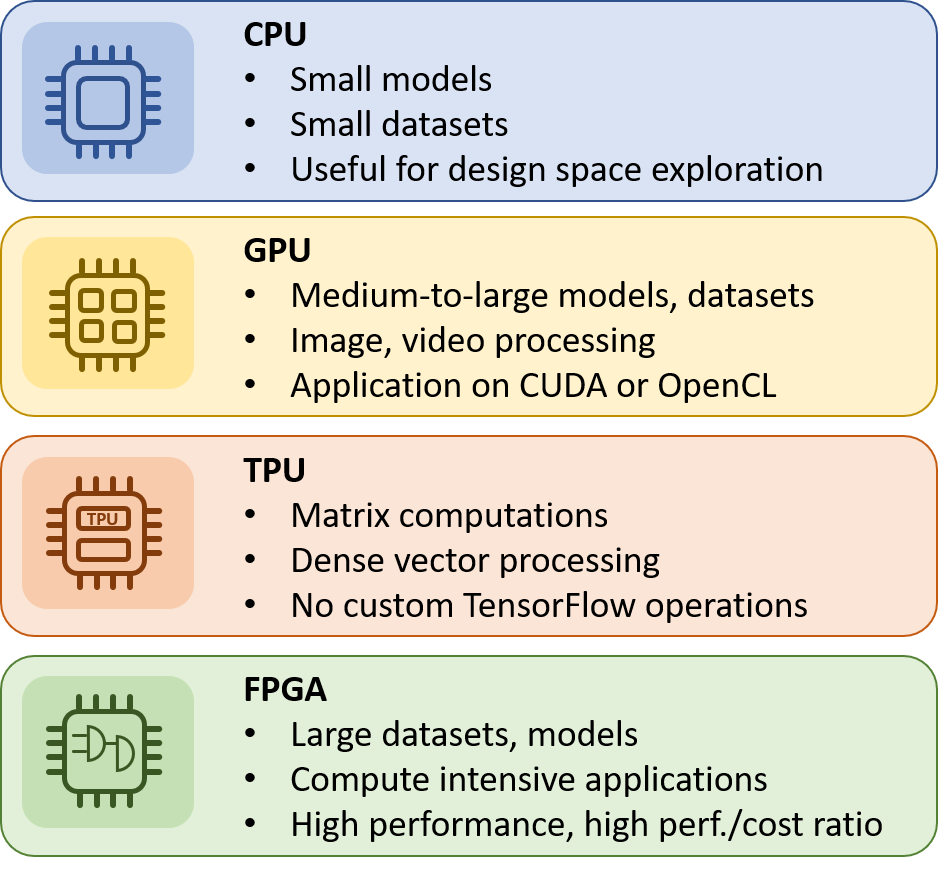

Une brève compréhension du matériel spécialisé et quand les utiliser :

Quand utiliser les processeurs : le principal avantage des processeurs est qu'il est très facile de les programmer et qu'il prend en charge n'importe quel cadre de programmation. Vous pouvez les programmer en C/C++, Scala, Java, Python ou tout autre nouveau langage. De cette façon, il est très facile de faire une exploration rapide de l'espace de conception et d'exécuter vos applications. Cependant, en ce qui concerne la formation à l'apprentissage automatique, elle est plus adaptée aux modèles simples qui ne prennent pas longtemps à s'entraîner et aux petits modèles avec de petites tailles de lots efficaces. Si vous souhaitez exécuter de grands modèles et de grands ensembles de données, le temps d'exécution total pour la formation à l'apprentissage automatique sera interdit.

Quand utiliser les GPU : Les GPU sont des unités de traitement spécialisées qui ont été principalement conçues pour traiter des images et des vidéos. Ils sont basés sur des unités de traitement plus simples que les processeurs, mais ils peuvent héberger un nombre de cœurs beaucoup plus important, ce qui les rend idéaux pour les applications dans lesquelles les données doivent être traitées en parallèle, comme les pixels d'images ou de vidéos. Cependant, les GPU sont programmés dans des langages comme CUDA et OpenCL et offrent donc une flexibilité limitée par rapport aux CPU.

Quand utiliser les TPU : les unités de traitement Tensor ont été conçues de bas en haut pour permettre une exécution plus rapide de l'application. Les TPU sont très rapides pour effectuer des calculs vectoriels et matriciels denses et sont spécialisés dans l'exécution de programmes très rapides basés sur Tensorflow. Ils sont très bien adaptés aux applications dominées par les calculs matriciels et aux applications et modèles sans opérations TensorFlow personnalisées à l'intérieur de la boucle de formation principale. Cela signifie qu'ils ont une flexibilité inférieure à celle des CPU et des GPU et qu'il n'est logique de les utiliser que lorsqu'il s'agit de modèles basés sur le TensorFlow.

In [ ]:
#@title
df_q12_q13 = df.copy()
df_q12_q13 = df_q12_q13.groupby(['Q13'])[['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4', 'Q12_Part_5', 'Q12_OTHER']
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q12_q13 = df_q12_q13.replace({'level_0' : 
                                 { 'Q12_Part_1' : 'NVIDIA GPUs', 'Q12_Part_2' : 'Google Cloud TPUs',
                                 "Q12_Part_3" : 'AWS Trainium Chips' ,  "Q12_Part_4" : 'AWS Inferentia Chips',     
                                  "Q12_Part_5" : 'None',  "Q12_OTHER": 'Other'
                                 }}) 
df_q12_q13 = df_q12_q13[df_q12_q13['level_0'] != 'None']
#df_q12_q13 = df_q12_q13[df_q12_q13['Q13'] != 'Never']

df_q12_q13 = df_q12_q13.sort_values(by='counts', ascending = False)

df_q12_q13_0 = df_q12_q13[df_q12_q13['Q13'] == 'Never'].drop('Q13', axis='columns').rename(columns = {'counts': 'Never'}, inplace = False)
df_q12_q13_1 = df_q12_q13[df_q12_q13['Q13'] == 'Once'].drop('Q13', axis='columns').rename(columns = {'counts': 'Once'}, inplace = False)
df_q12_q13_2 = df_q12_q13[df_q12_q13['Q13'] == '2-5 times'].drop('Q13', axis='columns').rename(columns = {'counts': '2-5 times'}, inplace = False)
df_q12_q13_3 = df_q12_q13[df_q12_q13['Q13'] == '6-25 times'].drop('Q13', axis='columns').rename(columns = {'counts': '6-25 times'}, inplace = False)
df_q12_q13_4 = df_q12_q13[df_q12_q13['Q13'] == 'More than 25 times'].drop('Q13', axis='columns').rename(columns = {'counts': 'More than 25 times'}, inplace = False)

df_q12_q13= pd.merge(df_q12_q13_0, df_q12_q13_1, on='level_0')
df_q12_q13= pd.merge(df_q12_q13, df_q12_q13_2, on='level_0')
df_q12_q13= pd.merge(df_q12_q13, df_q12_q13_3, on='level_0')
df_q12_q13= pd.merge(df_q12_q13, df_q12_q13_4, on='level_0')


Q13_values = df['Q13'].value_counts().reset_index(name='total')

fig = make_subplots(rows=1, cols=2, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0, 
                    specs=[[{"type": "bar"},{"type": "pie"}]],
                    column_widths=[0.6, 0.4])

colors = ['#0026ff', '#0055ff', '#0095ff', '#00d5ff', '#00ffea']

#fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['Never'], marker_color='#0026ff', name= 'Never',
#                     text=df_q12_q13['Never'], showlegend=False,  opacity=0.6),
#                     row=1, col=2)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['Once'], marker_color='#0055ff', name= 'Once',
                     text=df_q12_q13['Once'], showlegend=False, opacity=0.6),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['2-5 times'], marker_color='#0095ff', name= '2-5 times',
                      text=df_q12_q13['2-5 times'], showlegend=False, opacity=0.6), #, legendgroup = '1'
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['6-25 times'], marker_color='#00d5ff', name= '6-25 times',
                    text=df_q12_q13['6-25 times'], showlegend=False, opacity=0.6), #, legendgroup = '1'
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q12_q13['level_0'], y=df_q12_q13['More than 25 times'], marker_color='#00ffea', name= 'More than 25 times',
                     text=df_q12_q13['More than 25 times'], showlegend=False, opacity=0.6), 
                     row=1, col=1)
fig.update_traces(textposition='outside', marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)


fig.add_trace(go.Pie(
     values=Q13_values['total'],
     labels=Q13_values['index'].values, pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=colors, opacity=0.5,
     name="Coding Platform"),
    row=1, col=2)

fig.update_layout(
    title_text="Usage of specialized hardware and their usage frequencies by participants", title_x=0.5, title_y=0.9,
    xaxis1_title = 'Specialized Hardware',
    yaxis1_title = 'Usage frequency of TPU types',
    #legend_tracegroupgap = 180,
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)
fig.show()
df_q10_q13 = df.copy()
df_q10_q13 = df_q10_q13.groupby(['Q13'])[['Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4',
       'Q10_Part_5', 'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9',
       'Q10_Part_10', 'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13',
       'Q10_Part_14', 'Q10_Part_15', 'Q10_Part_16', 'Q10_OTHER']
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q10_q13_0 = df_q10_q13[df_q10_q13['Q13'] == 'Never'].drop('Q13', axis='columns').rename(columns = {'counts': 'Never'}, inplace = False)
df_q10_q13_1 = df_q10_q13[df_q10_q13['Q13'] == 'Once'].drop('Q13', axis='columns').rename(columns = {'counts': 'Once'}, inplace = False)
df_q10_q13_2 = df_q10_q13[df_q10_q13['Q13'] == '2-5 times'].drop('Q13', axis='columns').rename(columns = {'counts': '2-5 times'}, inplace = False)
df_q10_q13_3 = df_q10_q13[df_q10_q13['Q13'] == '6-25 times'].drop('Q13', axis='columns').rename(columns = {'counts': '6-25 times'}, inplace = False)
df_q10_q13_4 = df_q10_q13[df_q10_q13['Q13'] == 'More than 25 times'].drop('Q13', axis='columns').rename(columns = {'counts': 'More than 25 times'}, inplace = False)


df_q10_q13= pd.merge(df_q10_q13_0, df_q10_q13_1, on='level_0')
df_q10_q13= pd.merge(df_q10_q13, df_q10_q13_2, on='level_0')
df_q10_q13= pd.merge(df_q10_q13, df_q10_q13_3, on='level_0')
df_q10_q13= pd.merge(df_q10_q13, df_q10_q13_4, on='level_0')


df_q10_q13 = df_q10_q13.replace({'level_0' : 
                                 { 'Q10_Part_1' : 'Kaggle Notebooks', 'Q10_Part_2' : 'Colab Notebooks',
                                 "Q10_Part_3" : 'Azure Notebooks' ,  "Q10_Part_4" : 'Paperspace / Gradient',     
                                "Q10_Part_5" : 'Binder / JupyterHub', "Q10_Part_6" : 'Code Ocean',
                                "Q10_Part_7" : ' IBM Watson Studio', "Q10_Part_8" : 'Amazon Sagemaker Studio Notebooks', 
                                "Q10_Part_9" : ' Amazon EMR Notebooks',  "Q10_Part_10" : 'Google Cloud Notebooks (AI Platform / Vertex AI)', 
                                "Q10_Part_11" : 'Google Cloud Datalab', "Q10_Part_12" : ' Databricks Collaborative Notebooks',  
                                  "Q10_Part_13" : 'Zeppelin / Zepl Notebooks', "Q10_Part_14" : ' Deepnote Notebooks', 
                                  "Q10_Part_15" : 'Observable Notebooks', "Q10_Part_16" : 'None', "Q10_OTHER": 'Other'
                                 }})


plot = go.Figure(data=[go.Bar(
    name = 'Never',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['Never'], 
    orientation = 'h', text=df_q10_q13['Never'], marker_color='#02252e' , opacity = 0.7
   ),
                       go.Bar(
    name = 'Once',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['Once'],
    orientation = 'h', text=df_q10_q13['Once'], marker_color='#124739' , opacity = 0.7
   ),
                       go.Bar(
    name = '2-5 times',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['2-5 times'],
    orientation = 'h', text=df_q10_q13['2-5 times'], marker_color = '#0ba179', opacity = 0.7
   ),
                       go.Bar(
    name = '6-25 times',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['6-25 times'],
    orientation = 'h', text=df_q10_q13['6-25 times'], marker_color = '#84d4e8', opacity = 0.7
   ),
                       go.Bar(
    name = 'More than 25 times',
    y = df_q10_q13['level_0'],
    x = df_q10_q13['More than 25 times'],
    orientation = 'h', text=df_q10_q13['More than 25 times'], marker_color = '#bcdbe3', opacity = 0.7
   )                       
])

plot.update_yaxes(categoryorder='total ascending')
plot.update_traces(textposition="outside")
 
plot.update_layout(barmode='stack', title_text = "Notebook products and corresponding TPU usage by participants",
                  title_x = 0.5, title_y = 0.93,
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),)
                  
plot.show()

On constate que même si certaines entreprises offrent des services de matériel spécialisé, la plupart des participants l'ont peu utilisé. Alors que la plupart ne l'ont jamais utilisé (67,4 %), de nombreuses personnes ne l'ont utilisé qu'une fois ou 2 à 5 fois, ce qui montre à quel point il est moins utilisé par les participants. En ce qui concerne l'IA/ML, les GPU et les TPU ont beaucoup à offrir. Alors que les GPU ont la capacité de décomposer des problèmes complexes en milliers ou millions de tâches distinctes et de les résoudre toutes en même temps, les TPU ont été conçus spécifiquement pour les charges de réseau neuronal et ont la capacité de travailler plus rapidement que les GPU tout en utilisant moins de ressources. Mais cela dépend aussi des budgets que les projets ont à offrir pour utiliser ces installations.

De tous les types de matériels spécialisés présents, les plus populaires semblent être les GPU NVIDIA et les TPU Google Cloud, qui suscitent tous deux un intérêt presque similaire de la part des participants. Mais l'utilisation est encore faible, comme nous l'avons vu dans les graphiques précédents. C'est peut-être à cause du type d'exposition des participants, et peut-être qu'ils n'ont pas été correctement initiés à l'idée d'utiliser leur vitesse et leur puissance de calcul massive qui est principalement requise pour les mathématiques sous-jacentes dans l'apprentissage en profondeur.

D'après le graphique du bas, nous voyons que même si de nombreux ordinateurs portables disponibles pour les participants donnent accès à ce matériel spécialisé, la majorité des participants ne l'ont pas utilisé. Même les plus populaires comme Kaggle et Colab leur offrent un accès (Colab prend en charge le GPU gratuit et Kaggle offre un accès gratuit aux GPU NVIDIA TESLA P100), ils sont gravement sous-utilisés.

# Experience in Machine Learning

In [ ]:
#@title
blue_colors = ['#0099C6', '#19D3F3', '#17BECF', '#1CFFCE', '#2ED9FF', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

n_code_methods = df['Q15'].value_counts().reset_index(name='total')

fig.add_trace(go.Bar(
     x=n_code_methods['index'], y=n_code_methods['total'], showlegend=False,
    text =n_code_methods['total'],
     name="Coding methods"), 
     row=1, col=1)

fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

n_codemethod  = n_code_methods['index'].values

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=n_code_methods['total'],
     labels=n_codemethod, pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="Coding method"),
    row=1, col=2)


fig.update_layout(title_text='Coding method experiences by the participants', title_x=0.5,title_y=0.97,
                  legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

En regardant le graphique ci-dessus, on peut voir qu'il montre un niveau d'expérience similaire pour les participants ayant une expérience de codage. Cela signifie-t-il que la plupart d'entre eux avaient commencé à travailler sur des méthodes d'apprentissage automatique juste après avoir commencé à coder ? Découvrons-le. Puisque nous avons déjà discuté de la disparité d'implication des autres sexes dans la technologie, par rapport aux hommes, vérifions également les différences.

In [ ]:
#@title
fig = make_subplots(rows=2, cols=1, specs=[[{"type": "scatter"}], [{"type": "scatter"}]],
                   subplot_titles=('Experience 1', 'Experience 2'))

df_q26 = df[['Q2','Q6']]
df_q26['Q2'] = np.where(((df_q26['Q2'] != 'Man') & (df_q26['Q2'] != 'Woman')),'Other/Undisclosed genders',df_q26['Q2'])
df_q26 = pd.crosstab(df_q26.Q2, df_q26.Q6).T.reset_index() 
df_q26 = df_q26.loc(axis=0)[6,5,0,3,4,1,2].reset_index(drop=True)
df_q26['Q6'] = np.where((df_q26.Q6 == 'I have never written code'),'No experience',df_q26.Q6)

fig.add_trace(go.Scatter(x=df_q26['Man'], y=df_q26['Q6'], mode = 'markers', name='Man',
                          marker=dict(color='teal', size = 10), showlegend=False
             ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_q26['Woman'], y=df_q26['Q6'], mode = 'markers', name='Woman', showlegend=False,
                         marker=dict(color='orange', size = 10)
            ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_q26['Other/Undisclosed genders'], y=df_q26['Q6'], mode = 'markers', name='Other/Undisclosed genders',showlegend=False,
                         marker=dict(color='lightblue', size = 10)
            ), row=1, col=1)
for i in range(0, len(df_q26)):
    fig.add_shape(type='line',
                              x0 = df_q26['Man'][i],
                              y0 = i,
                              x1 = df_q26['Woman'][i],
                              y1 = i,
                              line=dict(color='#c6ccd8', width = 2), row=1, col=1)
    fig.add_shape(type='line',
                              x0 = df_q26['Woman'][i],
                              y0 = i,
                              x1 = df_q26['Other/Undisclosed genders'][i],
                              y1 = i,
                              line=dict(color='#647087', width = 2), row=1, col=1)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
)
fig.update_yaxes(tickmode='linear')


df_q215 = df[['Q2','Q15']]
df_q215['Q2'] = np.where(((df_q215['Q2'] != 'Man') & (df_q215['Q2'] != 'Woman')),'Other/Undisclosed genders',df_q215['Q2'])
df_q215 = pd.crosstab(df_q215.Q2, df_q215.Q15).T.reset_index() 
df_q215.iloc[0] = df_q215.iloc[0] + df_q215.iloc[2]
df_q215 = df_q215.drop(2).reset_index(drop=True)
df_q215.iloc[3] = df_q215.iloc[3] + df_q215.iloc[4]
df_q215 = df_q215.drop(4).reset_index(drop=True)
df_q215['Q15'] = np.where((df_q215.Q15 == '1-2 years2-3 years'),'1-3 years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == '3-4 years4-5 years'),'3-5 years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == 'Under 1 year'),'< 1 years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == '20 or more years'),'20+ years',df_q215.Q15)
df_q215['Q15'] = np.where((df_q215.Q15 == 'I do not use machine learning methods'),'No experience',df_q215.Q15)
df_q215 = df_q215.loc(axis=0)[5,6,0,3,4,1,2].reset_index(drop=True)

fig.add_trace(go.Scatter(x=df_q215['Man'], y=df_q215['Q15'], mode = 'markers', name='Man',
                          marker=dict(color='teal', size = 10),
             ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_q215['Woman'], y=df_q215['Q15'], mode = 'markers', name='Woman',
                         marker=dict(color='orange', size = 10),
            ), row=2, col=1)
fig.add_trace(go.Scatter(x=df_q215['Other/Undisclosed genders'], y=df_q215['Q15'], mode = 'markers', name='Other/Undisclosed genders',
                         marker=dict(color='lightblue', size = 10),
            ), row=2, col=1)
for i in range(0, len(df_q215)):
    fig.add_shape(type='line',
                              x0 = df_q215['Man'][i],
                              y0 = i,
                              x1 = df_q215['Woman'][i],
                              y1 = i,
                              line=dict(color='#c6ccd8', width = 2), row=2, col=1)
    fig.add_shape(type='line',
                              x0 = df_q215['Woman'][i],
                              y0 = i,
                              x1 = df_q215['Other/Undisclosed genders'][i],
                              y1 = i,
                              line=dict(color='#647087', width = 2), row=2, col=1)
fig.update_xaxes(matches='x')
fig.update_yaxes(tickmode='linear')

names = {'Experience 1':'Coding Experience', 'Experience 2':'Machine Learning Experience'}
fig.for_each_annotation(lambda a: a.update(text = names[a.text]))

fig.update_layout(height=500, 
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Coding and ML Experience", title_x=0.5, title_y=0.96,
                  template="plotly_white",
                  title_font=dict(size=25, color='#444', family="Muli, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.5))
fig.update_traces(mode = "markers+lines")

fig.show()

Comme nous pouvons le voir sur ces graphiques ci-dessus, la disparité de participation des sexes persiste en ce qui concerne à la fois le codage et les expériences de ML. Une tendance constante est observée ici où le nombre de participants ayant une expérience des méthodes ML est bien inférieur à celui de leur expérience de codage. L'écart est plus important chez les participants masculins ayant plus d'expérience, car l'apprentissage automatique semble être plus populaire auprès des codeurs débutants et de ceux qui débutent. La croissance naissante de la popularité du ML pourrait être due à certains facteurs tels que :

Les défis modernes sont de nature « haute dimensionnelle ».
Avec des sources de données riches, il est important de construire des modèles qui résolvent des problèmes dans un espace de grande dimension.
Grâce à lui, les modèles peuvent être intégrés dans un logiciel de travail. Il prend en charge les types de produits qui sont demandés par l'industrie.
En fait, l'apprentissage automatique est l'avenir. Des méthodes puissantes ont été développées et les principes sont bien compris dans des cadres statistiques et probabilistes.

Depuis que ce domaine a mûri à la fois en termes d'identité, de méthodes et d'outils, il a des options variées et donc l'horizon des emplois s'est élargi. En plus de l'abondance de données à partir desquelles apprendre, cela aide à comprendre et à améliorer les processus métier, réduisant ainsi le gaspillage de temps et d'argent.

# Machine Learning Frameworks

L'apprentissage automatique repose sur des algorithmes. Un cadre d'apprentissage automatique simplifie donc les algorithmes d'apprentissage automatique. Un framework ML est un outil, une interface ou une bibliothèque qui vous permet de développer facilement des modèles ML, sans comprendre les algorithmes sous-jacents.

In [ ]:
#@title
Q16_values = df.loc[:,['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4',
       'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9',
       'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13',
       'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17',
                       'Q16_OTHER']]

blue_colors = ['#0a4963', 'teal', '#0099C6','#17BECF', '#1CFFCE', '#19D3F3', '#2ED9FF', '#1da4de', '#00B5F7', '#0DF9FF', '#22FFA7', 
    'rgb(102, 197, 204)', 'rgb(56, 166, 165)', 'rgb(47, 138, 196)', '#2ED9FF', 'lightblue', '#7c96a1', '#3e4a4f']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(go.Bar(
     x=Q16_values.stack().unique(), y=Q16_values.stack().value_counts().values, showlegend=False,
    text =Q16_values.stack().value_counts().values,
     name="ML framework"), 
     row=1, col=1,)
fig.update_traces(textposition='outside', marker_color=blue_colors, marker_line_color='rgb(8,48,107)',  marker_line_width=1.5, opacity=0.6)

'''
df_q15_q16 = df.copy()
df_q15_q16 = df_q15_q16.groupby(['Q15'])[
                                 ['Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4',
                                   'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9',
                                   'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13',
                                   'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16', 'Q16_Part_17',
                                                   'Q16_OTHER']
                                 ].count().unstack().fillna(0).reset_index(name='16_counts')
df_q15_q16['Q15'] = df_q15_q16['Q15'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q15_q16['Q15'] = df_q15_q16['Q15'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q15_q16['Q15'] = df_q15_q16['Q15'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q15_q16 = df_q15_q16.replace({'level_0' : 
                                 { 'Q16_Part_1' : 'Scikit-learn', 'Q16_Part_2' : 'TensorFlow',
                                 "Q16_Part_3" : 'Keras' ,  "Q16_Part_4" : 'PyTorch',     
                                "Q16_Part_5" : 'Fast.ai', "Q16_Part_6" : 'MXNet',
                                "Q16_Part_7" : ' Xgboost', "Q16_Part_8" :' LightGBM', 
                                "Q16_Part_9" : ' CatBoost',  "Q16_Part_10" : 'Prophet', 
                                "Q16_Part_11" : ' H2O 3',  "Q16_Part_12" : 'Caret', 
                                  "Q16_Part_13" : ' Tidymodels', "Q16_Part_14" :' JAX', 
                                  "Q16_Part_15" : ' PyTorch Lightning', "Q16_Part_16" :' Huggingface',
                                "Q16_Part_17" : 'None', "Q16_OTHER": 'Other'
                                 }})
'''

# pull is given as a fraction of the pie radius
fig.add_trace(go.Pie(
     values=Q16_values.stack().value_counts().values,
     labels=Q16_values.stack().unique(), pull=[0.08, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=.3, 
    marker_colors=blue_colors, opacity=0.6,
     name="ML framework"),
    row=1, col=2)


#fig.update_traces(opacity=0.6)

fig.update_layout(title_text='Machine learning frameworks regularly used by participants', title_x=0.5, title_y=0.99,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5))
fig.show()

It is known that TensorFlow, PyTorch, and scikit-learn are the most popular ML frameworks, even though choosing which framework to use will depend on the work one is trying to perform. And it is similarly reflected in this graph. These frameworks are oriented towards mathematics and statistical modeling (machine learning) as opposed to neural network training (deep learning).

TensorFlow and PyTorch are direct competitors because of their similarity. They both provide a rich set of linear algebra tools, and they can run regression analysis.
Scikit-learn has been around a long time and would be most familiar to R programmers, but it comes with a big caveat: it is not built to run across a cluster.
Even though all 3 of these form in the top 5 of the most used frameworks, some other popular frameworks are:

Keras, a neural network library built on top of TensorFlow to make ML modelling straightforward. It simplifies some of the coding steps, like offering all-in-one models, Keras can also use the same code to run on a CPU or a GPU.
Caret, a comprehensive framework for building machine learning models in R. With R having so many implementations of ML algorithms, it can be challenging to keep track of which algorithm resides in which package. This is where Caret comes in handy, because no matter which package the algorithm resides, caret will remember that for us. It will just prompt to run install package for that particular algorithm's package.
Like Keras mostly uses TensorFlow for its backend, Fast.ai and PyTorch Lightning are built on PyTorch. LightGBM is almost 10 times faster than XGBoost based on experiments. Even though, XGBoost recently started to support leaf-wise approach in its new version, its default approach is level-wise. On the other hand, leaf-wise tends to be overfitting. That's why, XGBoost builds more robust models than LightGBM. Similarly, CatBoost tree can predict extraordinarily faster than either XGBoost or LightGBM. On the flip side, some of CatBoost's internal identification of categorical data slows its training time significantly in comparison to XGBoost, but it is still reported much faster than XGBoost.

But why then is LightGBM is seent to be more popular than XGBoost? If one has GPUs and strong CPUs, then XGBoost is more recommended since it is more scalable than LightGBM. But while building on a personal environment with no GPU and limited CPU power, LightGBM is mostly used in the early stages because it's faster and provides more time for feature egineering. Considering that most of the participants here do not use/rarely use specialized hardware, it is understandable why LightGBM is more preferred.

# Data Visualization tools vs Machine Learning algorithms

In [ ]:
#@title
df_q14_q15_q17 = df.copy()

df_q14_q15_q17['Q15'] = df_q14_q15_q17['Q15'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q14_q15_q17['Q15'] = df_q14_q15_q17['Q15'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q14_q15_q17['Q15'] = df_q14_q15_q17['Q15'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q14_q15 = df_q14_q15_q17.groupby(['Q15'])[["Q14_Part_1", "Q14_Part_2", "Q14_Part_3",
                                 "Q14_Part_4", "Q14_Part_5", "Q14_Part_6",
                                 "Q14_Part_7", "Q14_Part_8", "Q14_Part_9",
                                 "Q14_Part_10", "Q14_Part_11", "Q14_OTHER",] 
                                 ].count().unstack().fillna(0).reset_index(name='15_counts')
df_q14_q15 = df_q14_q15.sort_values(by='15_counts', ascending = True)

df_q15_q17 = df_q14_q15_q17.groupby(['Q15'])[[
                                 "Q17_Part_1", "Q17_Part_2", "Q17_Part_3",
                                 "Q17_Part_4", "Q17_Part_5", "Q17_Part_6",
                                 "Q17_Part_7", "Q17_Part_8", "Q17_Part_9",
                                 "Q17_Part_10", "Q17_Part_11", "Q17_OTHER"] 
                                 ].count().unstack().fillna(0).reset_index(name='17_counts')
df_q15_q17 = df_q15_q17.sort_values(by='17_counts', ascending = True)

df_q14_q15 = df_q14_q15.replace({'level_0' : 
                                 { 'Q14_Part_1' : 'Matplotlib', 'Q14_Part_2' : 'Seaborn',
                                 "Q14_Part_3" : ' Plotly / Plotly Express' ,  "Q14_Part_4" : 'Ggplot / ggplot2',     
                                "Q14_Part_5" : 'Shiny', "Q14_Part_6" : 'D3 js',
                                "Q14_Part_7" : ' Altair', "Q14_Part_8" :' Bokeh', 
                                "Q14_Part_9" : ' Geoplotlib',  "Q14_Part_10" : 'Leaflet / Folium', 
                                "Q14_Part_11" : 'None', "Q14_OTHER": 'Other'
                                 }})



df_q15_q17 = df_q15_q17.replace({'level_0' : 
                                 { 'Q17_Part_1' : 'Linear or Logistic Regression', 'Q17_Part_2' : 'Decision Trees or Random Forests',
                                 "Q17_Part_3" : 'Gradient Boosting Machines' ,  "Q17_Part_4" : 'Bayesian Approaches',     
                                "Q17_Part_5" : 'Evolutionary Approaches', "Q17_Part_6" : 'Dense Neural Networks',
                                "Q17_Part_7" : 'Convolutional Neural Networks', "Q17_Part_8" :'Generative Adversarial Networks', 
                                "Q17_Part_9" : 'Recurrent Neural Networks',  "Q17_Part_10" : 'Transformer Networks', 
                                "Q17_Part_11" : 'None', "Q17_OTHER": 'Other'
                                 }})

df_q14_q15_beginner = df_q14_q15[df_q14_q15['Q15']=='Beginner']
df_q14_q15_intermediate = df_q14_q15[df_q14_q15['Q15']=='Intermediate']
df_q14_q15_advanced = df_q14_q15[df_q14_q15['Q15']=='Advanced']

df_q15_q17_beginner = df_q15_q17[df_q15_q17['Q15']=='Beginner']
df_q15_q17_intermediate = df_q15_q17[df_q15_q17['Q15']=='Intermediate']
df_q15_q17_advanced = df_q15_q17[df_q15_q17['Q15']=='Advanced']

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "bar"}]], horizontal_spacing = 0.005)
fig.add_trace(go.Bar(y=df_q14_q15_beginner['level_0'], x=df_q14_q15_beginner['15_counts'], marker_color='teal', name='Beginner (0-2 years)',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q14_q15_intermediate['level_0'], x=df_q14_q15_intermediate['15_counts'], marker_color='orange', name='Intermediate (2-5 years)',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q14_q15_advanced['level_0'], x=df_q14_q15_advanced['15_counts'], marker_color='rgb(102,102,102)', name='Advanced (More than 5 years)',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig['layout']['xaxis'].update(autorange='reversed', title_text='DV tools')

'''
fig['layout']['xaxis'].update(
    annotations=[
    dict(
        x=2, y=2, # annotation point
        xref='x1', 
        yref='y1',
        text='dict Text',
        showarrow=True,
        arrowhead=7,
        ax=10,
        ay=70
    ),
    dict(
        ...
        # if have multiple annotations
    )
])
'''


fig.add_trace(go.Bar(y=df_q15_q17_beginner['level_0'], x=df_q15_q17_beginner['17_counts'], marker_color='teal', name='Beginner (0-2 years)',
                      orientation='h', opacity=0.8), 
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q17_intermediate['level_0'], x=df_q15_q17_intermediate['17_counts'], marker_color='orange', name='Intermediate (2-5 years)',
                     orientation='h', opacity=0.8 ),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q17_advanced['level_0'], x=df_q15_q17_advanced['17_counts'], marker_color='rgb(102,102,102)', name='Advanced (More than 5 years)',
                     orientation='h', opacity=0.8),
                     row=1, col=2)
fig['layout']['xaxis2'].update(title_text='ML algorithms')
#fig.update_yaxes(visible=False, categoryorder='total ascending')
fig.update_layout(title_text='Participants using data visualization (DV) tools and machine learning (ML) <br> algorithms as per participant\'s experience in ML', title_x=0.5, title_y=0.92,
                 legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                    yaxis=dict(side='left') , yaxis2=dict(side='right'))

Comme on peut le voir sur le graphique ci-dessus, une comparaison entre le sage des algorithmes ML et les outils DV a été faite. Alors que les codeurs ML de niveau débutant et intermédiaire fonctionnent avec presque tous les algorithmes ML énumérés ci-dessus (certains étant plus populaires que les autres), mais l'utilisation des outils DV parmi tous les participants semble être fortement prédominée par quelques-uns sélectionnés outils uniquement. De plus, les débutants semblent travailler davantage avec les outils DV qu'avec les algorithmes ML. Pourquoi?

La visualisation des données est l'une des compétences les plus importantes. Il fournit une suite importante d'outils pour identifier une compréhension qualitative. En ML, il est important de comprendre comment les données sont utilisées dans un modèle d'apprentissage automatique particulier avant de les utiliser avec l'un des algorithmes, et DV aide à analyser cela. Il est préférable que les débutants en apprennent davantage sur les données avant de s'y plonger. Sinon, tous les codeurs de niveau intermédiaire et expert semblent avoir une utilisation égale des outils DV et des algorithmes ML.

Parmi les algorithmes ML, la régression linéaire et la régression logistique sont les deux algorithmes les plus connus qui relèvent de la technique d'apprentissage supervisé. La régression linéaire est utilisée pour résoudre les problèmes de régression tandis que la régression logistique est utilisée pour résoudre les problèmes de classification.

# Computer Vision vs Natural Language Processing methods

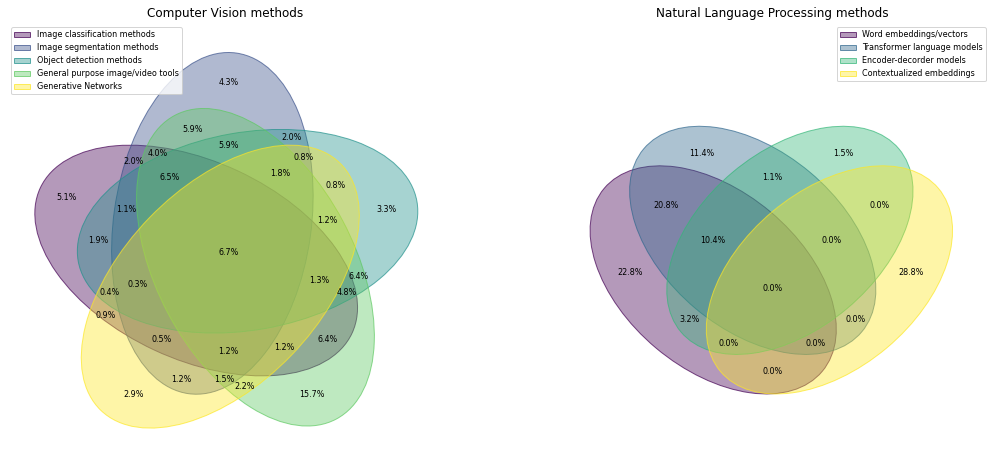

In [ ]:
#@title
Q18_values = df.loc[:,['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4',
       'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER']]

df_q18 = Q18_values.stack().value_counts().rename_axis('Computer Vision methods').reset_index(name='counts')
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Generative Networks (GAN, VAE, etc)'),'Generative Networks',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)'),
                                             'Image classification methods',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Image segmentation methods (U-Net, Mask R-CNN, etc)'),
                                             'Image segmentation methods',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'Object detection methods (YOLOv3, RetinaNet, etc)'),
                                             'Object detection methods',df_q18['Computer Vision methods'])
df_q18['Computer Vision methods'] = np.where((df_q18['Computer Vision methods'] == 'General purpose image/video tools (PIL, cv2, skimage, etc)'),
                                             'General purpose image/video tools',df_q18['Computer Vision methods'])

Q19_values = df.loc[:,['Q19_Part_1', 'Q19_Part_2', 'Q19_Part_3', 'Q19_Part_4',
       'Q19_Part_5',  'Q19_OTHER']]

df_q19 = Q19_values.stack().value_counts().rename_axis('NLP methods').reset_index(name='counts')

df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Word embeddings/vectors (GLoVe, fastText, word2vec)'),
                                             'Word embeddings/vectors',df_q19['NLP methods'])
df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Transformer language models (GPT-3, BERT, XLnet, etc)'),
                                             'Transformer language models',df_q19['NLP methods'])
df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Encoder-decorder models (seq2seq, vanilla transformers)'),
                                             'Encoder-decorder models',df_q19['NLP methods'])
df_q19['NLP methods'] = np.where((df_q19['NLP methods'] == 'Contextualized embeddings (ELMo, CoVe)'),
                                             'Contextualized embeddings',df_q19['NLP methods'])

df_q18_q19 = pd.concat([df_q18, df_q19], axis=1)
column_names =['CV methods', 'CV counts', 'NLP methods', 'NLP counts']
df_q18_q19.columns = column_names

blue_colors = ['#045669', '#1b7a8f', '#429eb3', '#69bed1', '#91d4e3', '#caf1fa']
orange_colors = ['#ad7309','#c28d2d','#d4ac63','#e6cc9c','#FFA500']

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q18_q19['CV methods'], y=df_q18_q19['CV counts'], name = "CV methods",
                 marker_color = blue_colors, text = df_q18_q19['CV counts'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q18_q19['NLP methods'], y=-df_q18_q19['NLP counts'], name = "NLP methods",
            marker_color = orange_colors, text = df_q18_q19['NLP counts'], textposition = "outside"))


fig.update_layout(barmode='relative',                  
    title_text='Participants using the two of the major areas of deep learning',
    height=500, title_x = 0.5, yaxis_title=" ", xaxis_title="Methods",
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-3500,5000])
fig.show()


d1 = df[~df['Q19_Part_1'].isnull()].index.tolist() 
d2 = df[~df['Q19_Part_2'].isnull()].index.tolist() 
d3 = df[~df['Q19_Part_3'].isnull()].index.tolist() 
d4 = df[~df['Q19_Part_5'].isnull()].index.tolist()
d5 = df[~df['Q18_Part_1'].isnull()].index.tolist() 
d6 = df[~df['Q18_Part_2'].isnull()].index.tolist() 
d7 = df[~df['Q18_Part_3'].isnull()].index.tolist() 
d8 = df[~df['Q18_Part_4'].isnull()].index.tolist()
d9 = df[~df['Q18_Part_5'].isnull()].index.tolist() 

_, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))
labels = ['Word embeddings/vectors',
 'Transformer language models',
 'Encoder-decorder models',
 'Contextualized embeddings',
 'Image classification methods',
 'Image segmentation methods',
 'Object detection methods',
 'General purpose image/video tools',
 'Generative Networks']
letters = iter(labels)

for n_sets, ax in zip(range(1,2), (ax1, ax2)):
    dataset_dict1 = {
        labels[4]: set(d5),
    labels[5]: set(d6),
    labels[6]: set(d7),
    labels[7]: set(d8),
    labels[8]: set(d9)
    }
    venn(dataset_dict1, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper left", ax=ax1)
    ax1.title.set_text('Computer Vision methods')
    dataset_dict2 = {
        labels[0]: set(d1),
    labels[1]: set(d2),
    labels[2]: set(d3),
    labels[3]: set(d4),
    }
    venn(dataset_dict2, fmt="{percentage:.1f}%", fontsize=8, legend_loc="upper right", ax=ax2)
    ax2.title.set_text('Natural Language Processing methods')

Computer Vision (CV) and Natural Language Processing (NLP), both are one of the most actively developing machine learning research areas. Data Science really can be termed as a blanket term for several disciplines, but the benefit of specializing in NLP or Computer Vision is that one will know what you are getting into, and can focus on learning and improving on those specific skills required by each, respective position. Both are good at tackling certain circumscribed tasks. But still, it can be seen that the number of participations in both is not similar. While some may prefer either or both, a general observation shows that NLP seems to be the less popular of the two. Why? It could be because of the following reasons:

* High accuracy in problem-solving. Many of the basic computer vision issues, like Object Detection and Face Recognition, have been solved with solid accuracy.
* Ubiquitous product coverage. Such big names like Facebook working in Facial Recognition and Google Goggles working in Object Detection have helped the computer vision technology become more mature.
* Great interest in image technologies. Many tech companies have been concentrating more on images than text. This could be one of the major reasons why participants prefer Computer Vision over NLP, because of its massive interest and support from Huge Tech Companies
* Advances in hardware.

Now let us understand more about each of them, and reach some conclusions for usage of the given methods in their respective areas:

Computer Vision
*  The participants working on Computer Vision is seen to share working in different CV methods like General purpose image/video tools (PIL, cv2, skimage, etc); Image segmentation methods (U-Net, Mask R-CNN, etc); Object detection methods (YOLOv3, RetinaNet, etc); Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc); and, Generative Networks (GAN, VAE, etc); among other less popular ones. About 6.7% of them work with ALL of these methods, but the most popular one among them is the image classification method with a whopping majority over the next popular one.
* Image clarification comprises of a variety of challenges, including viewpoint variation, scale variation, intra-class variation, image deformation, image occlusion, illumination conditions, and background clutter. CV researchers have come up with a data-driven approach to classify images into distinct categories. They provide the computer with a few examples of each image class and expand learning algorithms. Convolutional Neural Networks (CNNs) is the most famous architecture used for image classification. An average use case for CNNs is where one feeds the network images, and the network categorises the data. CNNs tend to start with an input “scanner” that isn’t intended to parse all the training data at once. For instance, to input an image of 100×100 pixels, one wouldn’t want a layer with 10,000 nodes.
* While image classification was already known to be the most popular one among the other methods generally, it was similarly refelected in the above graph. But the participants here are mostly seen to work only with image classification, and not a lot of them work with other methods. It could be because most of the beginners start with image classification, since most of the courses begin with an introduction to building classification models, before introducing to other methods.
* Apart from that, 4 other methods find a place in the top 5 list, which includes Object Detection, Object Tracking, Semantic Segmentation, and Instance Segmentation. The 4th and the 5th collectively form the image segmentation (Two major types of Image Segmentation: Semantic Segmentation: Objects classified with the same pixel values are segmented with the same colormaps. Instance Segmentation: It differs from semantic segmentation because different instances of the same object are segmented with different color maps.) From the above graph it is similarly reflected here since it occupies the 2nd position in the list, and it seems like the many of the participants here otherwise also indulge in working with Object detection and general purpose image/video tools.
* Image segmentation is the process of dividing an image into multiple segments. In this process, every pixel in the image is associated with an object type. Before detecting the objects and even before classifying the image, we need to understand what the image consists of, and this is where image segmentation helps. By applying Object Detection models, one can only be able to build a bounding box corresponding to each class in the image, not telling anything about the shape of the object as the bounding boxes are either rectangular or square in shape. Image Segmentation models on the other hand will create a pixel-wise mask for each object in the image. This technique gives a far more granular understanding of the object(s) in the image. Which explains why it has more popularity than object detection.
* Object detection is the task to identify objects within images usually involving outputting bounding boxes and labels for individual items. It differs from the classification task by using classification and localization to many objects instead of a single dominant object. There are only two classes of object classification. One is object bounding boxes, and other is non-object bounding boxes. For instance, in vehicle detection, one has to identify all vehicles, including two-wheelers and four-wheelers, in a given image with their bounding boxes. In short, it presents many sizable challenges beyond what is required for image classification, particularly because of these five challenges: dual priorities, speed, multiple scales, limited data, and class imbalance. Because of all these reasons and the fact that it needs to be conducted in a controlled environment, it seems to be much less popular than image classification, but almost at par with image segmentation.
* While we see much less participants working solely on object detection (being a challenging field), many of the participants also work on image segmentation and general purpose image/video tools. If we look at it from another angle, it might be suffice to say that object detection is popular to many people, but most of them seem to be pursuing it alongside other approaches. Could be because of the challenges it entails, and the lack of solutions to these problems. If more progress is made in this field, maybe it could gain even greater popularity in the future.
* Among all of the CV methods, general purpose image/video tools seem to be the most sought after for sole experiementation with image/video processing (more than 15%). Now this could be because of various reasons. The most obvious one could be that since image processing is a method to perform some operations on an image, to get an enhanced image or to extract some useful information from it, it can be used without the use of the other CV methods. An analysis could be very useful for understanding the image data and performing other functions like image enhancement, restoration, encoding, and compression. Other than that,an interesting point should be noted. Most of these processing tools either support Python along with some other langauges, or just Python. This further explains how the enhancement in various tools in Python has helped in the popularity and use of that language.
* Generative Networks do not seem as popular as all the other CV methods, even though popular generative networks like GANs remain as the most versatile neural network architectures in use today. It could be because of the problems: non-convergence (the model parameters oscillate, destabilize and never converge); mode collapse (the generator collapses which produces limited varieties of samples), and diminished gradient (the discriminator gets too successful that the generator gradient vanishes and learns nothing, but this could be improved by modification of the loss function in order to remove the vanishing gradient challenge). But maybe because overall generative networks are hard to train, they are not much popular among the participants.

Natural Language Processing

* The participants working on Computer Vision is seen to share working in different NLP methods like: word embeddings/vectors (GLoVe, fastText, word2vec); encoder-decoder models (seq2seq, vanilla transformers); contextualized embeddings (ELMo, CoVe), transformer language models (GPT-3, BERT, XLnet, etc); among other less popular ones. Unfortunately from the graph, it seems that not any participant work with all of the listed methods. In fact, very little correlation is seen between all of them.
* In NLP, word embedding is a term used for the representation of words for text analysis, typically capturing the semantic, syntactic context or a word/term that help understand how similar/dissimilar it is to other terms in an article, blog, etc. And it is known to be the most popular method among all, and it seems to show the same in the graph (over 40%). And the participants using word embeddings/vectors seem to use 2 of the other top methods listed here. The reason might be:
* * It can be learnt standalone, where a model is trained to learn the embedding, which is saved and used as a part of another model for your task later. This is a good approach if one would like to use the same embedding in multiple models.
* * Or, can be learnt Jointly, where the embedding is learned as part of a large task-specific model. This is a good approach if one only intend to use the embedding on one task. Because of its diverse nature, most of the NLP projects use pretrained word-embedding before using the other NLP models. Which is why we see many unions between word embeddings and other methods. Like image, it is always important to analyze text as well before working with it, and using word embeddings/vectors help us do that. But of course one only uses a new embedding (both static and updated types) if it results in better performance on your problem. Hence, it is popular, but not always required before approaching the other methods.
* Transformers form the 2nd most popular of the list, but amazingly falls quite behind word embeddings, given that it is often termed as the "coolest new NLP model". The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely. BERT, one of the most used model, uses the transformer architecture in addition to a number of different techniques to train the model, resulting in a model that performs at a SOTA level on a wide range of different tasks.While XLNet (arguably considered better than BERT), uses a different approach than BERT to achieve bidirectional dependencies (i.e. being able to learn context by not just processing input sequentially). It also uses an extension of the transformer architecture known as Transformer XL, which enables longer-term dependencies than the original transformer architecture. These models gained popularity because of being able to handle the dependencies between input and output with attention and recurrence completely. Additionally, it allows for significantly more parallelization and can reach a new state of the art in translation quality. All these perks might be the reason why it is so popular among the participants. And people working with transformers otherwise seem to work together with word embeddings than with other models. Or maybe the participants working with it are also well versed with the other models of NLP.
* The 3rd one, encoder decoder models (in some cases known as Sequence to Sequence (Seq2Seq) model) can be used for image captioning, semantic analysis and translation. Being a key model for understanding the advances in NLP (forms the seed for attention models and transformers), it can be used for many interesting works applications such as video captioning or question and answer. But all the information needs to be summarized in one dimensional vector, for long input sequences that can be extremely difficult to achieve. And also because of its limitations as an end-to-end approach, it can not be used for diverse applications. And like it was predicted, many of the participants who work with encoder decoder models, also work with transformers and word embeddings.
* Contextualized embeddings seem to be the least popular of all the methods and also used solely by the participants who work on it (may be for specialization purposes), because none of the participants who work on other method is seen to be working on this. One of the most used contextualized embedding, ELMO is embeddings from language models, hence a deep contextualized word representation (CoVe uses a supervised task like machine translation while ELMo uses an unsupervised task like language modelling). It is a breakout version of word token vectors or contextual word vectors and it learns word token vectors using long contexts, not context windows. It learns a deep bi-NLM and uses all its layers in prediction. (t uses Recurrent Neural Networks (RNNs) in the form of Long Short Term Memory (LSTM) architecture to generate contextualized word embeddings. ELMo, unlike BERT, is not built on the transformer architecture. However, it struggles with context-dependency on larger sentences because of that. It uses LSTMs to process sequential text. ELMo is like a bridge between the previous approaches such as GLoVe and Word2Vec and the transformer approaches such as BERT. But it is better to train the language model in the corpus that is related to the task that one is working on, and also use several techniques to improve the Language Model by including CNN character features or more deeper models as long as one gets a hidden representation to the words. This is where the other models come to play. .

# Industry Sectors

From different studies, it is seen that the fields of finance, professional services, and information technology employ the most data scientists.

* The finance industry, which includes banks, investment firms, insurance firms, and the real estate sector, uses data science to calculate risk, detect fraud, and predict market activity. In this context, data science is used to protect an organization’s bottom line. Financial institutions from big banks to insurance providers use data to prevent losses by flagging unprofitable customers, bad deals, and security breaches or scams. Data science is also used to automate trading and assess risks tied to major transactions.

* The academic services industry uses data science to improve the accuracy and efficiency of processes, and open the way for disruptive data-driven solutions. Aligned with these advancements, growing interest from professionals in academic disciplines outside of computer science, regarding what are the Data Science tools and techniques need to know to prepare for the future, and what are the relevant applications in their area of specialisation. Data scientists collaborate closely with researchers/academia to interpret findings and create actionable insights that will facilitate growth.

* The technology industry, which encompasses any number of app and digital platform makers and service providers, uses data as its primary driver of product development. Machine learning lies at the heart of nearly every social media product, and key tech industry players are constantly adapting algorithms and AI to improve user experience and, in turn, collect more consumer data.

Let's check if our data reflects the same as the general studies, and if the top most fields here are indeed popular as it said.

In [ ]:
#@title
df_q2_q20 = df.copy()
df_q2_q20['Q2'] = np.where(((df_q2_q20['Q2'] != 'Man') & (df_q2_q20['Q2'] != 'Woman')),'Other/Undisclosed genders',df_q2_q20['Q2'])
df_q2_q20 = pd.crosstab(df_q2_q20['Q20'], df_q2_q20['Q2']).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=df_q2_q20['Q20'], y=df_q2_q20['Man'], name = "Man",
                 marker_color = 'teal', text = df_q2_q20['Man'], textposition = "outside",
))
fig.add_trace(go.Bar(x=df_q2_q20['Q20'], y=-df_q2_q20['Woman'], name = "Woman",
            marker_color = 'orange', text = df_q2_q20['Woman'], textposition = "outside"))
fig.add_trace(go.Bar(x=df_q2_q20['Q20'], y=-df_q2_q20['Other/Undisclosed genders'], name = "Other/Undisclosed genders",
            marker_color = 'lightblue', text = df_q2_q20['Other/Undisclosed genders'], textposition = "outside"))

fig.update_layout(
    shapes=[
        dict(type="rect", xref="x", yref="y",
            x0=-0.5, y0=-1200, x1=2.5, y1=3800, line_width=3),
    ])

fig.add_annotation(
        x=2.5,
        y=2600,
        xref="x",
        yref="y",
        text="These top three industries cover more than 50% of the participants. <br> Consequently,these sectors seem to use data science more in their fields.",
        showarrow=True,
        font=dict(
            family="Muli, sans-serif",
            size=11,
            color="#222A2A"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=120,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )


fig.update_layout(barmode='relative',                  
    title_text='Gender Ratio based on their current industry',
    height=500, title_x = 0.45, yaxis_title=" ", xaxis_title="Industries",
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
                  
)

fig.update_xaxes(visible=True, categoryorder='total descending')
fig.update_yaxes(visible=False, range=[-1500,4000])
fig.show()

Looking at the above graph, it can be verified that those study results are true since these 3 sectors seem to dominate a lot over the other industrial sectors. While the reading is differentiated based on gender to see if any of the sectors show a different hiring trend than the other, it is clear that irrespective of the genders, most of them show a similar trend in hiring. But the proportion of the genders again is an issue here.

While the academics and technology see to employ a much higher number of other genders (not male) as compared to the others, especially in academia, the other industries however seem to show even lesser proportion. The financial sector seems to be lagging behind in terms of participation/hiring of other genders. A report on Wall Street Financial Firms had shown that it the most important reason it was dominated by men is because the largest gap in pay between women and men is in the financial services sector.

Hence, it is of great need that the participation of other genders are equally promoted in all the sectors to support a fair and just environment where everyone can progress based on their hard work, not on their gender.

Let us now check the relation between the job roles and the industry sectors.

# Occupation vs Industry sector

In [ ]:
#@title
df_q5_q20 = df[['Q5', 'Q20']]
names = ['Job role', 'Industry']
df_q5_q20.columns = names

df_q5_q20 = df_q5_q20[(df_q5_q20['Job role'] != "Student") & (df_q5_q20['Job role'] != "Currently not employed")] # Since they cannot be working in any industry right now
fig = px.box(df_q5_q20, x="Job role", y="Industry", notched=True,)
fig.update_layout(title_text ="Occupation vs Industry Sector", title_x = 0.5, title_y = 0.93)
fig.update_xaxes( categoryorder='total ascending')
 
fig.show()

Studying the plot above, it can be seen that most of the occupations in data science are spread around a few selected industry sectors. In fact, it further demonstrate what we had seen in the previous plot, that is, the two major sectors- computers/technology and academics/education take up for most of the participants, in quite a few job roles (with technology showing the bulk number). Also, since this data can be termed as a sample collection, including the notches give us an useful insight about our data. Notches are used to show the most likely values expected for the median when the data represents a sample. When a comparison is made between groups, you can tell if the difference between medians are statistically significant based on if their ranges overlap. If any of the notch areas overlap, then it is said that the medians are statistically different; if they do not have overlap, then we can have good confidence that the true medians differ. But many of them seem to have the overlap around the region near 'other' industry sector. Otherwise for the other values, the medians do show that they are statistically different, hence indicating unique distributions which have skews and outliers.

Let us now see if the participants in their respective industry sectors get compensated as per their experience in using machine learning methods.

Industry vs Compensations according to ML experiences
But before we take a look at the code, it should be noted that the income ranges have been further divided into four major groups (lower income, lower-middle income, upper-middle income, and upper income) for this plot study. They are:

* Lower income bracket: '0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999','4,000-4,999', '5,000-7,499', '7,500-9,999'
* Lower middle income bracket: '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999'
* Upper middle income bracket: '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999', '125,000-149,999'
* Upper income bracket: '150,000-199,999','200,000-249,999', '250,000-299,999', '300,000-499,999', '500,000-999,999', '>1,000,000'


Disclaimer: Please note that it is taken into account that the range of income limits might vary depending on countries, companies and for various other reasons. But for this study, it is assumed that a standard income bracket is maintained by the companies of all the participants, irrespective of their countries. All income bracket ranges are in US dollars($).

In [ ]:
#@title
df_q15_q20_q25 = df[['Q20', 'Q25', 'Q15']].dropna() 

df_q15_q20_q25 ['Q15'] = df_q15_q20_q25['Q15'].replace(dict.fromkeys(['I do not use machine learning methods', 'Under 1 year', '1-2 years'],'Beginner'))
df_q15_q20_q25 ['Q15'] = df_q15_q20_q25['Q15'].replace(dict.fromkeys(['2-3 years', '3-4 years', '4-5 years'],'Intermediate'))
df_q15_q20_q25 ['Q15'] = df_q15_q20_q25['Q15'].replace(dict.fromkeys(['5-10 years', '10-20 years', '20 or more years'],'Advanced'))

df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys([ '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                                       '4,000-4,999', '5,000-7,499', '7,500-9,999'],'Lower-income bracket'))
df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999', 
                                                                      '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                                       '40,000-49,999'],'Lower-middle-income bracket'))
df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys([ '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'Upper-middle income bracket'))
df_q15_q20_q25 ['Q25'] = df_q15_q20_q25['Q25'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999', '300,000-499,999',
                                                                       '$500,000-999,999', '>$1,000,000'],'Upper-income bracket'))



df_q15_q20_q25 = round(pd.crosstab(df_q15_q20_q25['Q25'], [df_q15_q20_q25['Q20'],df_q15_q20_q25['Q15']], normalize='index'), 2).T.reset_index()

df_q15_q20_q25_beginner = df_q15_q20_q25[df_q15_q20_q25['Q15']=='Beginner']
df_q15_q20_q25_intermediate = df_q15_q20_q25[df_q15_q20_q25['Q15']=='Intermediate']
df_q15_q20_q25_expert = df_q15_q20_q25[df_q15_q20_q25['Q15']=='Advanced']


fig = make_subplots(rows=1, cols=4, shared_yaxes=True, horizontal_spacing=0, vertical_spacing=0)      

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Lower-income bracket'], marker_color='teal', name='Beginner-level experience',
                     showlegend=False, orientation='h', opacity=0.8,),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Lower-income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Lower-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=1)

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Lower-middle-income bracket'], marker_color='teal', name='Beginner-level experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Lower-middle-income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Lower-middle-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=2)

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Upper-middle income bracket'], marker_color='teal', name='Beginner-level experience',
                     showlegend=False, orientation='h', opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Upper-middle income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Upper-middle income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', showlegend=False, opacity=0.8),
                     row=1, col=3)

fig.add_trace(go.Bar(y=df_q15_q20_q25_beginner['Q20'], x=df_q15_q20_q25_beginner['Upper-income bracket'], marker_color='teal', name='Beginner-level experience',
                    orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q15_q20_q25_intermediate['Q20'], x=df_q15_q20_q25_intermediate['Upper-income bracket'], marker_color='orange', name='Intermediate-level experience',
                     orientation='h', opacity=0.8),
                     row=1, col=4)
fig.add_trace(go.Bar(y=df_q15_q20_q25_expert['Q20'], x=df_q15_q20_q25_expert['Upper-income bracket'], marker_color='rgb(102, 102, 102)', name='Expert-level experience',
                     orientation='h', opacity=0.8),
                     row=1, col=4)

fig.update_layout(height=550, 
                  title_text="Yearly compensation of participants based on the industrial sector <br> they work in and their experience in using ML methods", title_x =0.5, title_y = 0.96,
                  template="plotly_white", barmode='stack',
                  autosize=True,
                 # margin=dict(t=80, b=50, l=70, r=40),
                 plot_bgcolor='white', paper_bgcolor='white', 
                title_font=dict(size=21, color='#222A2A', family="Muli, sans-serif"),
                         font=dict(color='#222A2A'),
                         legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=80,
                        ),
                 )

fig['layout']['xaxis'].update(title_text='Lower-income bracket', title_font=dict(size=12))
fig['layout']['xaxis2'].update(title_text='Lower-middle income bracket', title_font=dict(size=12))
fig['layout']['xaxis3'].update(title_text='Upper-middle income bracket', title_font=dict(size=12))
fig['layout']['xaxis4'].update(title_text='Upper-income bracket', title_font=dict(size=12))

fig.update_xaxes(zeroline=False,showticklabels=False, ticks="")
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))

fig.show()

Si nous suivons le graphique ci-dessus, il est évident que les participants ayant moins d'expérience forment la majorité des groupes de revenu inférieur à moyen inférieur, tandis que ceux qui ont le plus d'expérience se situent dans la tranche de revenu supérieure. Ceci est attendu car cela donne une perception générale de la valeur de l'expérience en ML dans les postes (éventuellement supérieurs) pour les services dans le domaine de la science des données. Chose intéressante, on constate également qu'il existe également un bon nombre de débutants qui se situent dans la tranche de revenu supérieure. Se pourrait-il qu'ils aient déjà maîtrisé le travail sur la science des données à court terme et donc obtenu de bonnes positions ? Ou peut-être que leur travail est basé sur un autre domaine (qui offre une rémunération élevée), mais ils sont eux-mêmes des praticiens de la science des données en herbe, ou cherchent peut-être à changer de travail. Une tendance générale observée, est la même que ce qui a été vu auparavant, à savoir que les 3 industries les plus populaires offrent plus d'opportunités à tous les niveaux de codeurs ML que les autres. Certaines valeurs aberrantes se situent dans la tranche de revenu inférieure où les personnes ayant une expérience de codage de niveau expert sont toujours présentes. Quelle raison cela pourrait-il être? Ici, il vaut la peine de revenir à l'avertissement comme indiqué au début, où nous ne considérons pas les taux de revenu des différents pays et entreprises, ce qui pourrait éventuellement être une raison de ce comportement inhabituel. Et cela pourrait également être vrai pour les groupes à revenu faible et moyen. Comme prévu, le groupe à faible revenu (et moyen-inférieur) compte principalement des débutants, et à mesure que nous remontons la courbe, de plus en plus d'industries semblent offrir plus de compensations aux personnes ayant plus d'expérience. Certains rémunèrent même leurs travailleurs en conséquence, ne montrant donc que des débutants pour les groupes à faible revenu et à revenu moyen inférieur, et une augmentation de salaire pour ceux qui ont plus d'expérience (comme l'hôtellerie/les sports/les divertissements et l'armée/la sécurité/la défense). Une observation générale pourrait être que pour toutes les industries indiquées ici, les industries offrent moins de postes, mais plus de rémunérations aux personnes ayant plus d'expérience (c'est-à-dire les postes supérieurs). Pourtant, il y a quelques secteurs qui n'ont pas encore correctement mis en œuvre la science des données dans leur travail et offrent donc moins de compensations (encore moins de postes peut-être) pour leur charge de travail, comme dans le transport maritime/transport et à but non lucratif/service.

# Company sizes vs data science workloads

In [ ]:
#@title
df_q21_q22 = pd.crosstab(df['Q21'], df['Q22']).reset_index()
df_q21_q22 = df_q21_q22.loc(axis=0)[0,4,3,2,1].reset_index(drop=True)

fig = go.Figure()

fig = go.Figure(data=[
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['0'], marker_color = '#065769', name='People responsible: 0',textposition = 'outside', text = df_q21_q22['0']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['1-2'], marker_color = '#15778c', name='People responsible: 1-2',textposition = 'outside', text = df_q21_q22['1-2']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['3-4'], marker_color = '#2d9cb5', name='People responsible: 3-4',textposition = 'outside', text = df_q21_q22['3-4']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['5-9'], marker_color = '#41b7d1', name='People responsible: 5-9', textposition = 'outside',text = df_q21_q22['5-9']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['10-14'], marker_color = '#55cbe6', name='People responsible: 10-14', textposition = 'outside',text = df_q21_q22['10-14']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['15-19'], marker_color = '#6ddaf2', name='People responsible: 15-19',textposition = 'outside', text = df_q21_q22['15-19']),
    go.Bar(x=df_q21_q22["Q21"], y=df_q21_q22['20+'], marker_color = '#92e9fc', name='People responsible: 20+',textposition = 'outside', text = df_q21_q22['20+']),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['0'], marker_color = '#065769', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['1-2'], marker_color = '#15778c', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['3-4'], marker_color = '#2d9cb5', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['5-9'], marker_color = '#41b7d1', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['10-14'], marker_color = '#55cbe6', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['15-19'], marker_color = '#6ddaf2', showlegend=False),
    go.Line(x=df_q21_q22["Q21"], y=df_q21_q22['20+'], marker_color = '#92e9fc', showlegend=False)
])



fig.add_annotation(
        x=2.0,
        y=1800,
        xref="x",
        yref="y",
        text="En suivant les lignes à l'intérieur de ce cercle, normalement chaque ligne devrait diminuer à mesure que nous montons <br> vers les entreprises avec plus d'employés. Mais même après un déclin constant, <br> certaines entreprises semblent toujours avoir très moins de personnes dans l'équipe <br> de science des données en fonction de la taille de leur entreprise.",
        showarrow=False,
        font=dict(
            family="Muli, sans-serif",
            size=11,
            color="#222A2A"
            ),
        align="center",
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ffffff",
        opacity=0.8
        )



fig.update_layout(
    shapes=[
        dict(type="circle", xref="x", yref="y",
            x0=0.2, y0=300, x1=0.7, y1=1400, line_width=3, line=dict(color='red')),
        dict(type="circle", xref="x", yref="y",
            x0=3.8, y0=150, x1=4.1, y1=500, line_width=3, line=dict(color='red')),
    ])


fig.update_layout(                
    title_text='Company size and number of individuals there who are responsible for data science workloads',
    height=500, title_x = 0.5, yaxis_title=" ", xaxis_title="Companies", title_y = 0.93,
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5)
)
fig.update_xaxes(visible=True, matches='x')

fig.show()

Commonly, with increase in the size of companies, they should hire more employees to certain key positions. Data science has recently gained much popularity, thanks to the diversity it possesses and the usefulness it provides. One of the advantages of data science is that organizations can find when and where their products sell best. This can help deliver the right products at the right time—and can help companies develop new products to meet their customers' needs. But it is still seen that many companies keep a fairly low employees in these key positions. The proportion and balance is clearly missing, and it has been reflected similarly in the above graph. Maybe some conclusions can be taken out of it.


While it is impressive to see that many small-sized companies employ a lot of data science workers (having 20+ on the team, for a company sized at less than 50 is impressive), it could be because those companies are more focused on data science (e.g., some firms provide data science consultancy services). And the curve of having more data science members for bigger-sized companies is seen, as expected. But it is still seen that many companies with more employees have a really small data science team. While it may be that most of them appoint external services for their data science works, it is better if they still employ more people to handle the data.


Let's see if it can be explained in the next section with the purpose of every data science team for the companies.

# Data science team in companies and their purposes

In [ ]:
#@title
df_q22_q23_q24 = df.copy()

df_q22_q23_q24 = df_q22_q23_q24.groupby(['Q22','Q23'])[["Q24_Part_1", "Q24_Part_2", "Q24_Part_3",
                                 "Q24_Part_4", "Q24_Part_5", "Q24_Part_6",
                                 "Q24_Part_7", "Q24_OTHER",] 
                                 ].count().unstack().fillna(0).reset_index()
df_q22_q23_q24 = df_q22_q23_q24.loc(axis=0)[0,1,5,6,2,3,4].reset_index(drop=True)
#df_q22_q23_q24 = df_q22_q23_q24.sort_values(by='24_counts', ascending = True)
df_q22_q23_q24 = df_q22_q23_q24.T.reset_index()[1:]
column_names = ['Q22', 'Q23', '0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+']
df_q22_q23_q24.columns = column_names

df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_1': 'Analyzing and understanding data to influence product/business decisions'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_2': 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_3': 'Building prototypes to explore applying machine learning to new areas'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_4': 'Building and/or running machine learning service that operationally improve product/workflows'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_5': 'Experimentation and iteration for improving existing ML models'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_6': 'Researching for advancing the state of the art of machine learning'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_Part_7': 'None'})
df_q22_q23_q24['Q22'] = df_q22_q23_q24['Q22'].replace({'Q24_OTHER': 'Other'})

df_q22_q23_q24_1_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_1_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'I do not know'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_1 = np.concatenate((df_q22_q23_q24_1_1, df_q22_q23_q24_1_2, df_q22_q23_q24_1_3, df_q22_q23_q24_1_4, df_q22_q23_q24_1_5, df_q22_q23_q24_1_6, df_q22_q23_q24_1_7, df_q22_q23_q24_1_8))

df_q22_q23_q24_2_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_2_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'No (we do not use ML methods)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_2 = np.concatenate((df_q22_q23_q24_2_1, df_q22_q23_q24_2_2, df_q22_q23_q24_2_3, df_q22_q23_q24_2_4, df_q22_q23_q24_2_5, df_q22_q23_q24_2_6, df_q22_q23_q24_2_7, df_q22_q23_q24_2_8))

df_q22_q23_q24_3_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_3_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We are exploring ML methods (and may one day put a model into production)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_3 = np.concatenate((df_q22_q23_q24_3_1, df_q22_q23_q24_3_2, df_q22_q23_q24_3_3, df_q22_q23_q24_3_4, df_q22_q23_q24_3_5, df_q22_q23_q24_3_6, df_q22_q23_q24_3_7, df_q22_q23_q24_3_8))

df_q22_q23_q24_4_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_4_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We have well established ML methods (i.e., models in production for more than 2 years)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_4 = np.concatenate((df_q22_q23_q24_4_1, df_q22_q23_q24_4_2, df_q22_q23_q24_4_3, df_q22_q23_q24_4_4, df_q22_q23_q24_4_5, df_q22_q23_q24_4_6, df_q22_q23_q24_4_7, df_q22_q23_q24_4_8))


df_q22_q23_q24_5_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_5_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We recently started using ML methods (i.e., models in production for less than 2 years)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_5 = np.concatenate((df_q22_q23_q24_5_1, df_q22_q23_q24_5_2, df_q22_q23_q24_5_3, df_q22_q23_q24_5_4, df_q22_q23_q24_5_5, df_q22_q23_q24_5_6, df_q22_q23_q24_5_7, df_q22_q23_q24_5_8))


df_q22_q23_q24_6_1 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Analyzing and understanding data to influence product/business decisions'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_2 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Building and/or running data infrastructure for storing, analyzing, and operationalizing data'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_3 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Building prototypes to explore applying machine learning to new areas'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_4 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Building and/or running machine learning service that operationally improve product/workflows'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_5 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Experimentation and iteration for improving existing ML models'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_6 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Researching for advancing the state of the art of machine learning'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_7 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'None'].drop(['Q22', 'Q23'], axis=1)
df_q22_q23_q24_6_8 = df_q22_q23_q24[df_q22_q23_q24.Q23 == 'We use ML methods for generating insights (but do not put working models into production)'][df_q22_q23_q24.Q22 == 'Other'].drop(['Q22', 'Q23'], axis=1)

df_q22_q23_q24_6 = np.concatenate((df_q22_q23_q24_6_1, df_q22_q23_q24_6_2, df_q22_q23_q24_6_3, df_q22_q23_q24_6_4, df_q22_q23_q24_6_5, df_q22_q23_q24_6_6, df_q22_q23_q24_6_7, df_q22_q23_q24_6_8))


fig = go.Figure(data=[go.Heatmap(
                   z=df_q22_q23_q24_1, zmid = 450, text=df_q22_q23_q24_1,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Not sure',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG, 
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_2, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Do not use ML methods',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_3, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='May one day put a model into production',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_4, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Models in production for more than 2 years',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_5, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Models in production for less than 2 years',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG, #px.colors.sequential.Tealgrn,
                                       hoverongaps = False),
                      go.Heatmap(
                   z=df_q22_q23_q24_6, zmid = 450,
                   x=['0', '1-2', '3-4', '5-9', '10-14', '15-19', '20+'], name='Do not put working models into production',
                   y=['Analyzing and understanding data to influence product/business decisions',
                                       'Building and/or running data infrastructure for storing, analyzing, and operationalizing data',
                                       'Building prototypes to explore applying machine learning to new areas',
                                       'Building and/or running machine learning service that operationally improve product/workflows',
                                       'Experimentation and iteration for improving existing ML models',
                                       'Researching for advancing the state of the art of machine learning',
                                       'None', 'Other'], colorscale=px.colors.diverging.BrBG,
                                       hoverongaps = False),
                     ])

    
fig.update_xaxes(side="top", title_text = "Individuals responsible for data science")
fig.update_yaxes(title_text = "Purpose of the respective workers")

fig.update_layout( 
     title_text = 'Companies incorporating Machine Learning and their people to workload ratio',
     title_x = 0.5, title_y = 0.96,
     margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b = 0
                        ),
     updatemenus=[
        dict(
            active=0,
            x=-0.5,
            y=1,
            buttons=list(
                [
                    dict(
                        label="Not sure",
                        method="update",
                        args=[
                            {"visible": [True, False, False, False, False, False]},
                        ],
                    ),
                    dict(
                        label="ML methods not used",
                        method="update",
                        args=[
                            {"visible": [False, True, False, False, False, False]},
                        ],
                    ),
                    dict(
                        label="Exploring ML methods",
                        method="update",
                        args=[
                            {"visible": [False, False, True, False, False, False]},
                        ],
                    ),
                    dict(
                        label="Well established in ML methods",
                        method="update",
                        args=[
                            {"visible": [False, False, False, True, False, False]},
                        ],
                    ),
                    dict(
                        label="Recently started using ML methods",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, True, False]},
                        ],
                    ),
                    dict(
                        label="Use ML methods for generating insights",
                        method="update",
                        args=[
                            {"visible": [False, False, False, False, False, True]},
                        ],
                    ),
                ]
            ),
        )
    ]
)

fig.show()

Le rapport charge de travail / capacité des entreprises de science des données (basé sur l'incorporation de méthodes ML) montre de nombreux faits intéressants. Quelle que soit l'étape d'incorporation des méthodes de ML, il semble que le but du ML d'analyser et de comprendre les données qui influencent les décisions produit/entreprise soit le plus recherché. Et on constate également que plus l'équipe de science des données s'agrandit, plus elle met de personnes au service de cet objectif, car cet objectif à lui seul est l'une des principales raisons de la popularité récente de la science des données dans les entreprises. Pour les entreprises qui utilisent uniquement ML pour générer des informations, en plus d'utiliser ML pour l'analyse et la compréhension, elles utilisent également ML pour créer des prototypes à explorer dans de nouveaux domaines, et pour stocker, analyser et opérationnaliser les données. C'est peut-être parce qu'ils ne font que commencer et qu'ils veulent tester les limites de la science des données avant de décider pleinement de l'intégrer dans leur entreprise au-delà du simple but de l'analyse. Et cela se voit donc de la même manière pour les entreprises où elles explorent la science des données ou s'y sont récemment lancées. Une conclusion clé est que les entreprises qui débutent dans l'utilisation des méthodes ML se concentrent davantage sur la construction de prototypes et l'exploration du sujet avant de l'intégrer pleinement dans leur entreprise, mais les entreprises qui sont déjà bien établies dans leur utilisation, se concentrent davantage sur le des expérimentations sur l'amélioration des modèles ML ainsi que l'amélioration du produit/flux de travail. Surtout si la capacité de l'équipe de science des données est supérieure, cela ouvre à son tour des champs d'exploration des données au-delà de l'utilisation limitée de la science des données. Par conséquent, les divers objectifs de la science des données peuvent être bénéfiques pour toute entreprise si elle décide de l'explorer davantage.

# Average hours spent on machine learning and/or cloud computing services at home (or at work)

Au fur et à mesure qu'une entreprise se développe, elle doit inévitablement choisir entre investir dans une infrastructure de serveur sur site ou une infrastructure basée sur le cloud pour gérer ses besoins informatiques. Surtout avec la pandémie, les entreprises dépensent plus pour utiliser ces services. Mais souvent en raison de leur nature coûteuse, il peut être utile de noter s'il est effectivement aussi utile qu'on le pense. Dans ce cas, peut-être qu'une étude comparative des experts en ML de niveau débutant à avancé et de leurs dépenses pour ces services par rapport à leurs rémunérations annuelles pourrait nous donner des informations utiles.

In [ ]:
#@title
df_q26_q25_q15 = df.copy()
df_q26_q25_q15_1 = df_q26_q25_q15[(df_q26_q25_q15['Q15'] == 'I do not use machine learning methods') | (df_q26_q25_q15['Q15'] == '1-2 years') | (df_q26_q25_q15['Q15'] == 'Under 1 year')]
df_q26_q25_q15_2 = df_q26_q25_q15[(df_q26_q25_q15['Q15'] == '4-5 years') | (df_q26_q25_q15['Q15'] == '3-4 years') | (df_q26_q25_q15['Q15'] == '2-3 years')]
df_q26_q25_q15_3 = df_q26_q25_q15[(df_q26_q25_q15['Q15'] == '5-10 years') | (df_q26_q25_q15['Q15'] == '10-20 years') | (df_q26_q25_q15['Q15'] == '20 or more years')]


fig = go.Figure()

df_q26_q25_q15_1 = pd.crosstab(df_q26_q25_q15_1['Q25'], df_q26_q25_q15_1['Q26'], rownames=['Q25'], colnames=['Q26'])
df_q26_q25_q15_1 = df_q26_q25_q15_1.reset_index()


fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$0 ($USD)'], 
        name="0", mode='lines+markers',
        marker_color="#023040",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$1-$99'], 
        name="1-99",mode='lines+markers',
        marker_color="#19647d",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$10,000-$99,999'], 
        name="10,000-99,999",mode='lines+markers',
        marker_color="#cc9e21",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$100,000 or more ($USD)'], 
        name="100,000+",mode='lines+markers',
        marker_color="#13b7ed",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_1['Q25'],
        y=df_q26_q25_q15_1['$1000-$9,999'], 
        name="1000-9,999",mode='lines+markers',
        marker_color="#943d0a",
    ),
)



df_q26_q25_q15_2 = pd.crosstab(df_q26_q25_q15_2['Q25'], df_q26_q25_q15_2['Q26'], rownames=['Q25'], colnames=['Q26'])
df_q26_q25_q15_2 = df_q26_q25_q15_2.reset_index()

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$0 ($USD)'], 
        name="0",mode='lines+markers',
        marker_color="#023040",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$1-$99'], 
        name="1-99",mode='lines+markers',
        marker_color="#19647d",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$10,000-$99,999'], 
        name="10,000-99,999", mode='lines+markers',
        marker_color="#cc9e21",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$100,000 or more ($USD)'],
        name="100,000+",mode='lines+markers',
        marker_color="#13b7ed",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_2['Q25'],
        y=df_q26_q25_q15_2['$1000-$9,999'], 
        name="1000-9,999",mode='lines+markers',
        marker_color="#943d0a",
    ),
)


df_q26_q25_q15_3 = pd.crosstab(df_q26_q25_q15_3['Q25'], df_q26_q25_q15_3['Q26'], rownames=['Q25'], colnames=['Q26'])
df_q26_q25_q15_3 = df_q26_q25_q15_3.reset_index()

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$0 ($USD)'],
        name="0",mode='lines+markers',
        marker_color="#023040",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$1-$99'],
        name="1-99",mode='lines+markers',
        marker_color="#19647d",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$10,000-$99,999'],
        name="10,000-99,999",mode='lines+markers',
        marker_color="#cc9e21",
    ),
)
fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$100,000 or more ($USD)'],
        name="100,000+",mode='lines+markers',
        marker_color="#13b7ed",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_q26_q25_q15_3['Q25'],
        y=df_q26_q25_q15_3['$1000-$9,999'],
        name="1000-9,999",mode='lines+markers',
        marker_color="#943d0a",
    ),
)



fig.update_layout(
    template="simple_white", title_text = 'Participants who work on ML methods and their spendings on computing platforms', 
    title_x = 0.5, title_y = 0.95, showlegend= True,
    xaxis=dict(title_text="Current yearly compensation (approximate $USD)"),
    yaxis=dict(title_text="Number of people spending an amount <br> on computing services at home <br>(or at work) in the past 5 years <br> (approximate $USD)"),
    legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
    #legend_title="Money spent",
)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.65,
            y=0.95,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Beginners",
                        method="update",
                        args=[
                            {"visible": [True, True,True,True,True, False,False,False,False,False,False,False,False,False,False]},
                        ],
                    ),
                    dict(
                        label="Intermediates",
                        method="update",
                        args=[
                            {"visible": [False,False,False,False,False, True, True,True,True,True, False,False,False,False,False]},
                        ],
                    ),
                    dict(
                        label="Experts",
                        method="update",
                        args=[
                            {"visible": [False,False,False,False,False,False,False,False,False,False,True, True,True,True,True]},
                        ],
                    ),
                ]
            ),
        )
    ]
)

fig.show()

Comme prévu, certaines observations communes sont visibles dans le graphique ci-dessus. En comparant la rémunération annuelle au montant dépensé en ML et (ou) en services informatiques, elle est considérée comme assez populaire parmi les participants (bien que les intermédiaires et les experts semblent l'utiliser davantage, ce qui est attendu). Même ainsi, de nombreux participants n'ont pas encore essayé de travailler avec. Cela peut être dû à diverses raisons. Premièrement, une tendance générale peut être observée avec la corrélation entre la rémunération et les dépenses pour les services, c'est-à-dire qu'avec plus de rémunération, l'intérêt pourrait être lié à l'utilisation d'un plus grand nombre de ces services. Bien que cela ne soit pas toujours considéré comme linéairement lié, les personnes ayant une tranche de revenu plus élevée semblent opter davantage pour ces services. Par exemple, pour les services cloud, cela peut également être dû à l'utilisation de services cloud proposés sur un réseau qui permettent aux entreprises d'accéder à distance à leur infrastructure, ce qui a été particulièrement utile pendant la pandémie, lorsque la plupart du travail a été effectué à distance. En plus d'être hautement évolutif, flexible et plus rapide, l'utilisation des services virtuels du cloud offre également des fonctionnalités telles que les conteneurs et le sans serveur. Et la réduction ou l'élimination du besoin d'infrastructure en permettant une main-d'œuvre et une collaboration à distance, cela déplace l'attention de l'informatique vers la spécialisation et le recyclage. Augmenter la fiabilité et éliminer les redondances. Cela pourrait être l'une des raisons pour lesquelles les entreprises financent ou aident à mettre en place de tels lieux de travail au domicile de leurs travailleurs. Pour beaucoup, cela pourrait également être dû au fait que leur travail est basé sur l'utilisation de ces services, ce qui explique leurs dépenses en services. Mais pour les petites entreprises disposant de moins de ressources, cela pourrait également être un obstacle, compte tenu des vulnérabilités technologiques, en particulier sur les environnements partagés, ainsi que des interfaces et des API non sécurisées, entre autres. C'est donc encore un domaine en développement, un peu comme le ML. Et avec l'intérêt naissant des gens dans ces domaines, de plus en plus de gens aimeront / travailleront avec.

# Compensation and other demographic comparisons between top programming languages

Comme le montrent les graphiques précédents, il existe une nette majorité de Python par rapport aux autres langages en ce qui concerne les préférences. Comparons les lectures de Python avec les deux autres langages de codage dans le top 3 (R et SQL) et voyons différentes tendances à travers leurs graphiques démographiques, y compris leur rémunération annuelle (c'est-à-dire la tranche de revenu).

In [ ]:
#@title
#Python R/SQL demographic plot
df_copy = df.copy()
df_copy = df_copy[['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q25', 'Q8']]
df_copy['Q2'] = np.where(((df_copy['Q2'] != 'Man') & (df_copy['Q2'] != 'Woman')),'Other/Undisclosed',df_copy['Q2'])
df_copy['Q6'] = df_copy['Q6'].replace(dict.fromkeys(['I have never written code', '< 1 years', '1-3 years'],'Beginner'))
df_copy['Q6'] = df_copy['Q6'].replace(dict.fromkeys(['3-5 years', '5-10 years'],'Intermediate'))
df_copy['Q6'] = df_copy['Q6'].replace(dict.fromkeys(['10-20 years', '20+ years'],'Advanced'))
df_copy['Q4'] = np.where((df_copy['Q4'] == 'No formal education past high school'),'High school passout',df_copy['Q4'])
df_copy['Q4'] = np.where((df_copy['Q4'] == 'Some college/university study without earning a bachelor’s degree'),'Higher study w/o bachelor’s',df_copy['Q4'])
df_copy['Q5'] = np.where((df_copy['Q5'] == 'Machine Learning Engineer'),'ML Engineer',df_copy['Q5'])
df_copy['Q5'] = np.where((df_copy['Q5'] == 'Developer Relations/Advocacy'),'Dev Relations/Advocacy',df_copy['Q5'])
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys([ '$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999',
                                                                       '4,000-4,999', '5,000-7,499', '7,500-9,999'],'Lower-income'))
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys([ '10,000-14,999', '15,000-19,999', 
                                                                      '20,000-24,999', '25,000-29,999', '30,000-39,999',
                                                                       '40,000-49,999'],'Lower-middle-income'))
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys([ '50,000-59,999', '60,000-69,999', '70,000-79,999',
                                                                      '80,000-89,999', '90,000-99,999', '100,000-124,999',
                                                                       '125,000-149,999'],'Upper-middle income'))
df_copy ['Q25'] = df_copy['Q25'].replace(dict.fromkeys(['150,000-199,999','200,000-249,999',
                                                                       '250,000-299,999', '300,000-499,999',
                                                                       '$500,000-999,999', '>$1,000,000'],'Upper-income'))



df_py = df_copy.copy()
df_py = df_py[df_py['Q8'] == 'Python']

df_rsql =df_copy.copy()
df_rsql = df_rsql[(df_rsql['Q8'] == 'R') | (df_rsql['Q8'] == 'SQL')]

df_py_age = df_py.groupby(['Q1']).size().reset_index().rename(columns={0:'age count'})
df_py_gen = df_py.groupby(['Q2']).size().reset_index().rename(columns={0:'gen count'})
df_py_edu = df_py.groupby(['Q4']).size().reset_index().rename(columns={0:'edu count'})
df_py_ocp = df_py.groupby(['Q5']).size().reset_index().rename(columns={0:'ocp count'})
df_py_cod = df_py.groupby(['Q6']).size().reset_index().rename(columns={0:'cod count'})
df_py_sal = df_py.groupby(['Q25']).size().reset_index().rename(columns={0:'sal count'})

df_rsql_age = df_rsql.groupby(['Q1']).size().reset_index().rename(columns={0:'age count'})
df_rsql_gen = df_rsql.groupby(['Q2']).size().reset_index().rename(columns={0:'gen count'})
df_rsql_edu = df_rsql.groupby(['Q4']).size().reset_index().rename(columns={0:'edu count'})
df_rsql_ocp = df_rsql.groupby(['Q5']).size().reset_index().rename(columns={0:'ocp count'})
df_rsql_cod = df_rsql.groupby(['Q6']).size().reset_index().rename(columns={0:'cod count'})
df_rsql_sal = df_rsql.groupby(['Q25']).size().reset_index().rename(columns={0:'sal count'})

fig = make_subplots(rows=2, cols=3, horizontal_spacing=0.035, vertical_spacing=0.1)                    
fig.add_trace(go.Bar(x=df_py_age['Q1'], y=df_py_age['age count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_age['age count'], opacity=0.8, showlegend=False),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_rsql_age['Q1'], y=df_rsql_age['age count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_age['age count'], opacity=0.8, showlegend=False),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_py_gen['Q2'], y=df_py_gen['gen count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_gen['gen count'], opacity=0.8, showlegend=False),
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_rsql_gen['Q2'], y=df_rsql_gen['gen count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_gen['gen count'], opacity=0.8, showlegend=False),
                     row=1, col=2)

fig.add_trace(go.Bar(x=df_py_edu['Q4'], y=df_py_edu['edu count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_edu['edu count'], opacity=0.8, showlegend=False),
                     row=2, col=2)
fig.add_trace(go.Bar(x=df_rsql_edu['Q4'], y=df_rsql_edu['edu count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_edu['edu count'], opacity=0.8, showlegend=False),
                     row=2, col=2)

fig.add_trace(go.Bar(x=df_py_ocp['Q5'], y=df_py_ocp['ocp count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_ocp['ocp count'], opacity=0.8, showlegend=False),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_rsql_ocp['Q5'], y=df_rsql_ocp['ocp count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_ocp['ocp count'], opacity=0.8, showlegend=False),
                     row=2, col=1)

fig.add_trace(go.Bar(x=df_py_cod['Q6'], y=df_py_cod['cod count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_cod['cod count'], opacity=0.8, showlegend=False),
                     row=1, col=3)
fig.add_trace(go.Bar(x=df_rsql_cod['Q6'], y=df_rsql_cod['cod count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_cod['cod count'], opacity=0.8, showlegend=False),
                     row=1, col=3)

fig.add_trace(go.Bar(x=df_py_sal['Q25'], y=df_py_sal['sal count'], marker_color='teal', name='Python',textposition='outside',
                     text=df_py_sal['sal count'], opacity=0.8),
                     row=2, col=3)
fig.add_trace(go.Bar(x=df_rsql_sal['Q25'], y=df_rsql_sal['sal count'], marker_color='orange', name='R/SQL',textposition='outside',
                      text=df_rsql_sal['sal count'], opacity=0.8),
                     row=2, col=3)

fig['layout']['xaxis5'].update(tickangle=90)
fig['layout']['xaxis6'].update(tickangle=90)
fig.update_layout(yaxis2 = dict(range=[0, 18000]), yaxis3 = dict(range=[0, 12500]),  yaxis6 = dict(range=[0, 6000]))

fig.update_layout(height=750,
                 title_text='Demographic plot of the most popular programming languages', title_x=0.5, 
                 legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="center", x=0.5),
                 hoverlabel=dict(font=dict(family='sans-serif', size=14)),
                 
                 annotations = [dict(
                    x=0.93,
                    y=1.06,    
                    xref='paper',
                    yref='paper',
                    text="Coding experience",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),
                              dict(
                    x=0.12,
                    y=1.06,    
                    xref='paper',
                    yref='paper',
                    text="Age",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),
                 dict(
                    x=0.5,
                    y=1.06,    
                    xref='paper',
                    yref='paper',
                    text="Gender",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),
                 dict(
                    x=0.10,
                    y=-0.395,    
                    xref='paper',
                    yref='paper',
                    text="Occupation",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),  
                  dict(
                    x=0.5,
                    y=-0.395,    
                    xref='paper',
                    yref='paper',
                    text="Education level",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                ),  
                  dict(
                    x=0.93,
                    y=-0.395,    
                    xref='paper',
                    yref='paper',
                    text="Yearly compensation",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="black"
                            ),
                    bordercolor="white"
                )
                               ]
                 
                 )

fig.show()

Quelques informations utiles que nous obtenons des figures ci-dessus:

* Python est un langage populaire parmi les participants plus âgés et plus jeunes. Le groupe d'âge des 25-29 ans semble être le groupe le plus actif en utilisant R/SQL parmi tous les participants.
* L'écart entre l'utilisation de Python et de R/SQL est plus important chez les hommes que chez les femmes (et autres/non divulgués).
* Python est clairement un favori parmi les codeurs de tous niveaux d'expérience, mais les débutants semblent préférer commencer davantage avec Python.
* Les observations montrent que les professions directement liées au domaine de la science des données semblent utiliser davantage R/SQL, parmi toutes les professions. Cela pourrait être dû au fait que R est l'un des langages statistiques les plus utilisés pour l'analyse des données après Python, et vient donc en deuxième position après la préférence (bien que l'écart soit encore important). L'écart entre l'utilisation de ces langages est moindre avec les statisticiens, ce qui suggère à quel point les deux langages (R et Python) sont proches pour le nettoyage, l'analyse et la représentation graphique des données.
* Les ingénieurs logiciels utilisent beaucoup plus Python que les utilisateurs R/SQL. Fait intéressant cependant, les ingénieurs DBA/Database semblent préférer Python à SQL, même si les DBA sont réputés avoir une connaissance approfondie de SQL. Cela peut être dû au fait que les fonctions SQL ont moins d'applications que Python, et donc que Python dépasse progressivement SQL pour la gestion de base de données.
* Les participants ayant un niveau d'éducation Master et Bachelor forment la majorité de l'enquête, et ils préfèrent tous les deux Python beaucoup plus que les deux autres. Parmi les différents niveaux d'éducation, il semble que les participants précédemment mentionnés, ainsi que les participants titulaires d'un doctorat soient les seuls à utiliser R/SQL. La préférence pourrait être due aux autres facteurs démographiques mentionnés précédemment.
* Étant donné le nombre inférieur de participants préférant R/SQL, il semble y avoir une meilleure opportunité d'obtenir plus de salaire, car beaucoup d'entre eux se situent dans la tranche de salaire supérieure à moyenne et supérieure. Alors que même si les utilisateurs de Python reçoivent un salaire plus élevé dans toutes les fourchettes de salaire, la proportionnalité d'un salaire plus élevé est inférieure à celle des utilisateurs de R/SQL.

# Cloud Computing platforms used vs preferred

In [ ]:
#@title
df_q27a_q28 = df.copy()

df_q27a_q28 = df_q27a_q28.groupby(['Q28'])[["Q27_A_Part_1", "Q27_A_Part_2", "Q27_A_Part_3",
                                 "Q27_A_Part_4", "Q27_A_Part_5", "Q27_A_Part_6",
                                 "Q27_A_Part_7", "Q27_A_Part_8", "Q27_A_Part_9",
                                 "Q27_A_Part_10", "Q27_A_Part_11", "Q27_A_OTHER",] 
                                 ].count().unstack().fillna(0).reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_q27a_q28 = df_q27a_q28.loc[~(df_q27a_q28['counts'] == 0)]

df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_1'),
                                             'Amazon Web Services (AWS)',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_2'),
                                             'Microsoft Azure',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_3'),
                                             'Google Cloud Platform (GCP)',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_4'),
                                             'IBM Cloud / Red Hat',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_5'),
                                             'Oracle Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_6'),
                                             'SAP Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_7'),
                                             'Salesforce Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_8'),
                                             'VMware Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_9'),
                                             'Alibaba Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_10'),
                                             'Tencent Cloud',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_Part_11'),
                                             'None',df_q27a_q28['level_0'])
df_q27a_q28['level_0'] = np.where((df_q27a_q28['level_0'] == 'Q27_A_OTHER'),
                                             'Other',df_q27a_q28['level_0'])
column_names = ['Q27a', 'Q28', 'counts']
df_q27a_q28.columns = column_names

df_q27a_q28= df_q27a_q28.replace({'They all had a similarly enjoyable developer experience': 'Similar experience for all'})
df_q27a_q28 = df_q27a_q28.loc[~((df_q27a_q28['Q27a'] == 'Other') | (df_q27a_q28['Q28'] == 'Other'))]

def genSankey(df,cat_cols=[],value_cols='',title=''):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#0a4963', 'orange', 'lightblue']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

sank = genSankey(df_q27a_q28,cat_cols=['Q27a', 'Q28'],value_cols='counts')

fig = go.Figure(sank)

fig.update_layout(height = 400, width = 800,
    template="simple_white", title_text = 'Participants who work on one cloud platform and their respective preferences', 
    title_x = 0.5, title_y = 0.95, 
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    annotations = [dict(
        x=1,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Platform with the best developer experience",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    ),
                  dict(
        x=0,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Cloud computing platforms used on a regular basis",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    )]
)
fig.update_yaxes(visible = False)
fig.update_xaxes(visible = False)
iplot(fig)

Il semble y avoir une rude concurrence entre les 3 meilleures plates-formes ici. Bien qu'Amazon Web Services (AWS) semble ouvrir la voie aux deux autres, ce n'est que par une petite marge. Il est suivi de près par Google Cloud Platform (GCP) et Microsoft Azure respectivement. Ils sont collectivement connus sous le nom de The Big 3 Cloud Platforms. Même si AWS est le leader actuel du marché en termes de capacité et de service, Microsoft et Google se développent également rapidement pour concurrencer AWS. Et les participants qui utilisent régulièrement l'un ou l'autre d'entre eux, la majorité d'entre eux se montrent satisfaits des services fournis par leurs plateformes préférées et ont donc choisi ces plateformes comme préférences. Pour ceux qui n'ont pas pu se décider, ils semblent partager une expérience similaire pour toutes les plateformes (et la plupart d'entre eux ont travaillé pour le top 3). Par conséquent, il est prudent de dire que le top 3 domine toute autre plate-forme en termes de services et d'installations qui leur sont fournies, ainsi que l'expérience et l'expertise qu'elle possède pour fournir une plate-forme cloud fiable et riche en fonctionnalités. Beaucoup d'entre eux ont essayé avec plusieurs plates-formes, mais certains d'entre eux ne sont mentionnés par aucun des participants comme leur préféré.

Microsoft en particulier est sur les talons d'AWS avec son fort accent sur l'entreprise. Pendant ce temps, Google continue de faire évoluer sa présence en fournissant d'excellentes intégrations avec des projets open source et des services tiers. Et les stratégies multi-cloud fournies pour tirer parti des forces offertes par chaque fournisseur de cloud poussent davantage les participants à travailler sur plusieurs plates-formes, comme nous le voyons dans l'intrigue

# Cloud platforms providing big data products and their usage with business tools

In [ ]:
#@title
df_q28_q33_q35 = df.copy()

df_q28_q33_q35 = df_q28_q33_q35.groupby(['Q28', 'Q33', 'Q35']).size().reset_index(name='count').sort_values(by=['count'], ascending = False)
df_q28_q33_q35 = df_q28_q33_q35.loc[~(df_q28_q33_q35['count'] == 0)]
df_q28_q33_q35 = df_q28_q33_q35.loc[~((df_q28_q33_q35['Q28'] == 'Other') | (df_q28_q33_q35['Q33'] == 'Other') | (df_q28_q33_q35['Q35'] == 'Other'))]

sank = genSankey(df_q28_q33_q35,cat_cols=['Q28', 'Q33', 'Q35'],value_cols='count')
fig = go.Figure(sank)
fig.update_layout(template="simple_white", 
                  title_text = 'Relation between developer experience vs big data product and business intelligent tools preferred by developers', 
                  title_x = 0.5, title_y = 0.95,
                  margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=10, #bottom margin
                        ),
                  annotations = [dict(
                            x=1,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Business tools",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                 dict(
                            x=0.5,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Big data products",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        ),
                                      dict(
                            x=0,
                            y=1.1,    
                            xref='paper',
                            yref='paper',
                            text="Cloud computing platforms",
                            showarrow = False,
                            font=dict(
                                    family="Muli, sans-serif",
                                    size=14,
                                    color="black"
                                    ),
                            bordercolor="white",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="white",
                            opacity=0.8
                        )]
                 )
iplot(fig)

Comme nous l'avons vu dans le graphique précédent, les types de services proposés par les plates-formes cloud sont très exclusifs, mais diversifiés, ce qui répond aux intérêts de l'utilisateur. Amazon étant la plate-forme supérieure, est considérée comme fournissant le plus de services (de la mise en réseau à la robotique), avec certains produits généraux aux côtés des leurs. Comme il est souvent considéré comme la référence en matière de capacité de calcul, de fiabilité et de sécurité du cloud, il est également associé à de grands éditeurs de logiciels pour rendre leurs programmes disponibles sur AWS. GCP, d'autre part, offre une excellente prise en charge des charges de travail conteneurisées et fonctionne bien avec d'autres services et produits Google. Les services de Microsoft Azure méritent également d'être notés, y compris les meilleurs services d'IA, de ML et d'analyse, et la prise en charge des stratégies de cloud hybride. Il est également relativement moins cher pour la plupart des services par rapport à AWS et GCP.

# Big data products and Business tools (usage vs preferred)

In [ ]:
#@title
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

Q32a_values = df.loc[:,["Q32_A_Part_1", "Q32_A_Part_2", "Q32_A_Part_3",
                                 "Q32_A_Part_4", "Q32_A_Part_5", "Q32_A_Part_6",
                                 "Q32_A_Part_7", "Q32_A_Part_8", "Q32_A_Part_9",
                                 "Q32_A_Part_10", "Q32_A_Part_11","Q32_A_Part_12", "Q32_A_Part_13",
                                 "Q32_A_Part_14", "Q32_A_Part_15", "Q32_A_Part_16",
                                 "Q32_A_Part_17", "Q32_A_Part_18", "Q32_A_Part_19",
                                 "Q32_A_OTHER"]]

big_data_products = df['Q33'].value_counts().reset_index(name='total')
trace0 = go.Scatter(
                x=big_data_products['index'],
                y=big_data_products['total'],
                mode='lines+markers',
                line=dict(color='teal'),showlegend=False,
                name='big data products',
)

trace1 = go.Bar(
                x=Q32a_values.stack().unique(), y=Q32a_values.stack().value_counts().values, showlegend=False,
    text =Q32a_values.stack().value_counts().values,
                marker=dict(color='lightblue',line=dict(color='teal',width=1)), textposition='outside',
                name='big data products',
                
)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)

Q34a_values = df.loc[:,["Q34_A_Part_1", "Q34_A_Part_2", "Q34_A_Part_3",
                                 "Q34_A_Part_4", "Q34_A_Part_5", "Q34_A_Part_6",
                                 "Q34_A_Part_7", "Q34_A_Part_8", "Q34_A_Part_9",
                                 "Q34_A_Part_10", "Q34_A_Part_11","Q34_A_Part_12", "Q34_A_Part_13",
                                 "Q34_A_Part_14", "Q34_A_Part_15", "Q34_A_OTHER"]]

business_products = df['Q35'].value_counts().reset_index(name='total')
trace3 = go.Scatter(
                x=business_products['index'],
                y=business_products['total'],
                mode='lines+markers',
                line=dict(color='teal'),showlegend=False,
                name='business tools products',
)

trace4 = go.Bar(
                x=Q34a_values.stack().unique(), y=Q34a_values.stack().value_counts().values, showlegend=False,
    text =Q34a_values.stack().value_counts().values,
                marker=dict(color='lightblue',line=dict(color='teal',width=1)), textposition='outside',
                name='business tools products',
                
)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)


fig.update_layout(title_text='Big data products vs business tools usage and preference', title_x=0.5,
                 
                 annotations = [dict(
                    x=0.5,
                    y=1.2,   
                    xref='paper',
                    yref='paper',
                    text="Dans les deux diagrammes, les lignes montrent les préférences des participants et les graphiques à barres montrent ce qu'ils utilisent régulièrement.",
                    showarrow = False,
                    font=dict(
                            family="Muli, sans-serif",
                            size=14,
                            color="#ffffff"
                            ),
                    bordercolor="#c7c7c7",
                    borderwidth=2,
                    borderpad=4,
                    bgcolor="#222A2A",
                    opacity=0.8
                )])

fig['layout']['xaxis'].update(title_text='Big data products', title_font=dict(size=12))
fig['layout']['xaxis2'].update(title_text='Business tools', title_font=dict(size=12))


iplot(fig)

D'après les chiffres ci-dessus, il semble que pour les produits Big Data et les outils commerciaux, il existe un énorme écart entre le nombre de personnes qui utilisent régulièrement un certain produit et celles qu'elles préfèrent. Si certains produits et outils semblent bien se comporter parmi les participants, étant donné que le rapport entre les produits/outils utilisés et préférés est presque le même (comme le serveur Microsoft SQL dans les produits Big Data et Google Data Studio dans les outils commerciaux ), certains ne le font même pas s'ils sont utilisés à grande échelle (comme IBM Db2 pour les produits Big Data et Alteryx pour les outils métiers). Quelle pourrait être la raison derrière cela?

# Data science learning platforms vs media sources

In [ ]:
#@title
Q40_values = df.loc[:,["Q40_Part_1", "Q40_Part_2", "Q40_Part_3",
                                 "Q40_Part_4", "Q40_Part_5", "Q40_Part_6",
                                 "Q40_Part_7", "Q40_Part_8", "Q40_Part_9",
                                 "Q40_Part_10", "Q40_OTHER"]].stack().reset_index(name='Q40').drop('level_1', axis=1)

Q42_values = df.loc[:,["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]].stack().reset_index(name='Q42').drop('level_1', axis=1)

df_q40_q42 = pd.merge(Q40_values, Q42_values, on='level_0')

df_q40_q42 = df_q40_q42.groupby(['Q40','Q42']).size().reset_index().rename(columns={0:'counts'})


sank = genSankey(df_q40_q42,cat_cols=['Q40','Q42'],value_cols='counts')

fig = go.Figure(sank)
fig.update_layout(height = 400, width = 800,
    template="simple_white", title_text = 'Platforms which are popular among participants for data science courses <br>vs the popular data science media sources', 
    title_x = 0.5, title_y = 0.95, 
    margin=go.layout.Margin(
                            l=0, #left margin
                            r=0, #right margin
                            b=0, #bottom margin
                            t=70,
                        ),
    annotations = [dict(
        x=1,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Media sources for data science topic",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    ),
                  dict(
        x=0,
        y=1.1,    
        xref='paper',
        yref='paper',
        text="Platforms providing data science courses",
        showarrow = False,
        font=dict(
                family="Muli, sans-serif",
                size=12,
                color="black"
                ),
        bordercolor="white",
        borderwidth=2,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    )]
)

fig.update_yaxes(visible = False)
fig.update_xaxes(visible = False)
iplot(fig)

On peut voir que la plate-forme Kaggle a joué un rôle déterminant non seulement dans la fourniture de cours à de nombreux praticiens de la science des données, mais également en leur offrant une exposition maximale au domaine.

En ce qui concerne les cours en ligne, Coursera a toujours été le plus populaire, offrant un grand nombre de cours en ligne ouverts (MOOC), de spécialisations et de diplômes dans une gamme de sujets, y compris la science des données, l'apprentissage automatique et l'intelligence artificielle. Alors qu'Udemy, qui est spécialement conçu pour améliorer les compétences professionnelles des participants, est également populaire car il propose une collection de cours, dont plus de 100 000 cours vidéo en ligne, avec plus de 1 000 cours de science des données et d'apprentissage automatique. Comme il offre souvent d'énormes rabais sur certains cours, il pourrait être un choix populaire parmi les jeunes participants. DataCamp est une autre plate-forme populaire pour les participants, d'autant plus qu'elle est dédiée aux aspirants en science des données, avec des cours aux niveaux débutant et avancé. Cela explique la figure ci-dessus, puisque la majorité des participants ici sont des débutants. Mais le plus remarquable d'entre eux est la plate-forme Kaggle, principalement parce qu'elle sert de communauté en ligne de scientifiques des données et de praticiens de l'apprentissage automatique. Il a gagné en popularité au fil des ans et a même dépassé toutes les autres plates-formes remarquables d'apprentissage en ligne (autres que Coursera) dans ce court laps de temps. En leur fournissant une plate-forme pour interagir et rivaliser dans la résolution de problèmes réels tout en améliorant leurs compétences, cela donne aux participants la possibilité de trouver et de publier des ensembles de données et de créer des modèles dans un environnement de science des données basé sur le Web. Outre ces avantages, il propose également des micro-cours en ligne qui peuvent être utiles à ceux qui souhaitent se perfectionner rapidement. En leur offrant un excellent écosystème pour s'engager, se connecter et collaborer avec d'autres scientifiques des données afin de créer d'incroyables modèles d'apprentissage automatique, il est particulièrement avantageux pour les débutants d'apprendre et d'approfondir leurs connaissances en science des données.

Par conséquent, cela explique également pourquoi Kaggle est la plate-forme la plus populaire en tant que source médiatique pour le thème de la science des données, parmi les participants. Comme on le voit dans cette figure ci-dessus, Kaggle (carnets, forums, etc.) et ses forums ont été la source d'information et de divertissement la plus populaire pour les scientifiques des données du monde entier, suivis de Youtube tels que Kaggle Youtube et Could AI Adventures, et Des blogs tels que Vers la science des données et Analytics Vidhya. Les participants de toutes les plateformes en ligne semblent utiliser Kaggle, bien plus qu'ils ne se livrent à d'autres sources médiatiques.

Pouvons-nous peut-être trouver une relation entre l'utilisation de ces sources médiatiques, en fonction de l'âge, du niveau d'éducation et de la profession ? Regardons.

In [ ]:
#@title
df_q1_q42 = df.copy()
df_q1_q42 = df_q1_q42.groupby(['Q1'])[["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q1_q42 = df_q1_q42.replace({'level_0' : 
                                 { 'Q42_Part_1' : 'Twitter', 'Q42_Part_2' : 'Email newsletters',
                                 "Q42_Part_3" : 'Reddit' ,  "Q42_Part_4" : 'Kaggle',     
                                "Q42_Part_5" : 'Course Forums', "Q42_Part_6" : 'YouTube',
                                "Q42_Part_7" : 'Podcasts', "Q42_Part_8" : 'Blogs', 
                                "Q42_Part_9" : 'Journal Publications',  "Q42_Part_10" : 'Slack Communities', 
                                 "Q42_OTHER": 'Other'
                                 }})


df_q1_q42_1 = df_q1_q42[df_q1_q42['Q1'] == '18-21'].drop(['Q1'], axis=1).rename(columns = {'counts': '18-21'})
df_q1_q42_2 = df_q1_q42[df_q1_q42['Q1'] == '22-24'].drop(['Q1'], axis=1).rename(columns = {'counts': '22-24'})
df_q1_q42_3 = df_q1_q42[df_q1_q42['Q1'] == '25-29'].drop(['Q1'], axis=1).rename(columns = {'counts': '25-29'})
df_q1_q42_4 = df_q1_q42[df_q1_q42['Q1'] == '30-34'].drop(['Q1'], axis=1).rename(columns = {'counts': '30-34'})
df_q1_q42_5 = df_q1_q42[df_q1_q42['Q1'] == '35-39'].drop(['Q1'], axis=1).rename(columns = {'counts': '35-39'})
df_q1_q42_6 = df_q1_q42[df_q1_q42['Q1'] == '40-44'].drop(['Q1'], axis=1).rename(columns = {'counts': '40-44'})
df_q1_q42_7 = df_q1_q42[df_q1_q42['Q1'] == '45-49'].drop(['Q1'], axis=1).rename(columns = {'counts': '45-49'})
df_q1_q42_8 = df_q1_q42[df_q1_q42['Q1'] == '50-54'].drop(['Q1'], axis=1).rename(columns = {'counts': '50-54'})
df_q1_q42_9 = df_q1_q42[df_q1_q42['Q1'] == '55-59'].drop(['Q1'], axis=1).rename(columns = {'counts': '55-59'})
df_q1_q42_10 = df_q1_q42[df_q1_q42['Q1'] == '60-69'].drop(['Q1'], axis=1).rename(columns = {'counts': '60-69'})
df_q1_q42_11 = df_q1_q42[df_q1_q42['Q1'] == '70+'].drop(['Q1'], axis=1).rename(columns = {'counts': '70+'})


df_q1_q42 = pd.merge(df_q1_q42_1, df_q1_q42_2, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_3, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_4, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_5, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_6, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_7, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_8, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_9, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_10, on='level_0')
df_q1_q42 = pd.merge(df_q1_q42, df_q1_q42_11, on='level_0')

df_q4_q42 = df.copy()
df_q4_q42 = df_q4_q42.groupby(['Q4'])[["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q4_q42 = df_q4_q42.replace({'level_0' : 
                                 { 'Q42_Part_1' : 'Twitter', 'Q42_Part_2' : 'Email newsletters',
                                 "Q42_Part_3" : 'Reddit' ,  "Q42_Part_4" : 'Kaggle',     
                                "Q42_Part_5" : 'Course Forums', "Q42_Part_6" : 'YouTube',
                                "Q42_Part_7" : 'Podcasts', "Q42_Part_8" : 'Blogs', 
                                "Q42_Part_9" : 'Journal Publications',  "Q42_Part_10" : 'Slack Communities', 
                                 "Q42_OTHER": 'Other'
                                 }})


df_q4_q42_1 = df_q4_q42[df_q4_q42['Q4'] == 'Bachelor’s degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Bachelor’s degree'})
df_q4_q42_2 = df_q4_q42[df_q4_q42['Q4'] == 'Master’s degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Master’s degree'})
df_q4_q42_3 = df_q4_q42[df_q4_q42['Q4'] == 'Doctoral degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Doctoral degree'})
df_q4_q42_4 = df_q4_q42[df_q4_q42['Q4'] == 'I prefer not to answer'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Prefer not to answer'})
df_q4_q42_5 = df_q4_q42[df_q4_q42['Q4'] == 'Some college/university study without earning a bachelor’s degree'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Without Bachelor’s degree'})
df_q4_q42_6 = df_q4_q42[df_q4_q42['Q4'] == 'No formal education past high school'].drop(['Q4'], axis=1).rename(columns = {'counts': 'No formal education past high school'})
df_q4_q42_7 = df_q4_q42[df_q4_q42['Q4'] == 'Professional doctorate'].drop(['Q4'], axis=1).rename(columns = {'counts': 'Professional doctorate'})


df_q4_q42 = pd.merge(df_q4_q42_1, df_q4_q42_2, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_3, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_4, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_5, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_6, on='level_0')
df_q4_q42 = pd.merge(df_q4_q42, df_q4_q42_7, on='level_0')

df_q5_q42 = df.copy()
df_q5_q42 = df_q5_q42.groupby(['Q5'])[["Q42_Part_1", "Q42_Part_2", "Q42_Part_3",
                                 "Q42_Part_4", "Q42_Part_5", "Q42_Part_6",
                                 "Q42_Part_7", "Q42_Part_8", "Q42_Part_9",
                                 "Q42_Part_10", "Q42_OTHER"]
                                 ].count().unstack().fillna(0).reset_index(name='counts')

df_q5_q42 = df_q5_q42.replace({'level_0' : 
                                 { 'Q42_Part_1' : 'Twitter', 'Q42_Part_2' : 'Email newsletters',
                                 "Q42_Part_3" : 'Reddit' ,  "Q42_Part_4" : 'Kaggle',     
                                "Q42_Part_5" : 'Course Forums', "Q42_Part_6" : 'YouTube',
                                "Q42_Part_7" : 'Podcasts', "Q42_Part_8" : 'Blogs', 
                                "Q42_Part_9" : 'Journal Publications',  "Q42_Part_10" : 'Slack Communities', 
                                 "Q42_OTHER": 'Other'
                                 }})


df_q5_q42_1 = df_q5_q42[df_q5_q42['Q5'] == 'Other'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Other'})
df_q5_q42_2 = df_q5_q42[df_q5_q42['Q5'] == 'Program/Project Manager'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Program/Project Manager'})
df_q5_q42_3 = df_q5_q42[df_q5_q42['Q5'] == 'Software Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Software Engineer'})
df_q5_q42_4 = df_q5_q42[df_q5_q42['Q5'] == 'Research Scientist'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Research Scientist'})
df_q5_q42_5 = df_q5_q42[df_q5_q42['Q5'] == 'Currently not employed'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Currently not employed'})
df_q5_q42_6 = df_q5_q42[df_q5_q42['Q5'] == 'Student'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Student'})
df_q5_q42_7 = df_q5_q42[df_q5_q42['Q5'] == 'Data Scientist'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Data Scientist'})
df_q5_q42_8 = df_q5_q42[df_q5_q42['Q5'] == 'Data Analyst'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Data Analyst'})
df_q5_q42_9 = df_q5_q42[df_q5_q42['Q5'] == 'Machine Learning Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Machine Learning Engineer'})
df_q5_q42_10 = df_q5_q42[df_q5_q42['Q5'] == 'Business Analyst'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Business Analyst'})
df_q5_q42_11 = df_q5_q42[df_q5_q42['Q5'] == 'Data Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Data Engineer'})
df_q5_q42_12 = df_q5_q42[df_q5_q42['Q5'] == 'Product Manager'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Product Manager'})
df_q5_q42_13 = df_q5_q42[df_q5_q42['Q5'] == 'Statistician'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Statistician'})
df_q5_q42_14 = df_q5_q42[df_q5_q42['Q5'] == 'Developer Relations/Advocacy'].drop(['Q5'], axis=1).rename(columns = {'counts': 'Developer Relations/Advocacy'})
df_q5_q42_15 = df_q5_q42[df_q5_q42['Q5'] == 'DBA/Database Engineer'].drop(['Q5'], axis=1).rename(columns = {'counts': 'DBA/Database Engineer'})


df_q5_q42 = pd.merge(df_q5_q42_1, df_q5_q42_2, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_3, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_4, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_5, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_6, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_7, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_8, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_9, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_10, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_11, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_12, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_13, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_14, on='level_0')
df_q5_q42 = pd.merge(df_q5_q42, df_q5_q42_15, on='level_0')

fig = make_subplots(rows=3, cols=1, horizontal_spacing=0, vertical_spacing=0, shared_xaxes=True)                    
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['18-21'], marker_color='#022f52', name='18-21',
                     text=df_q1_q42['18-21'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['22-24'], marker_color='#104670', name='22-24',
                      text=df_q1_q42['22-24'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['25-29'], marker_color='#095e9e', name='25-29',
                     text=df_q1_q42['25-29'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)


fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['30-34'], marker_color='#1f74b5', name='30-34',
                     text=df_q1_q42['30-34'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['35-39'], marker_color='#228fe3', name='35-39',
                     text=df_q1_q42['35-39'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['40-44'], marker_color='#4aa8f0', name='40-44',
                     text=df_q1_q42['40-44'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)


fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['45-49'], marker_color='#61b3f2', name='45-49',
                     text=df_q1_q42['45-49'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['50-54'], marker_color='#6db0e3', name='50-54',
                     text=df_q1_q42['50-54'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['55-59'], marker_color='#89c3f0', name='55-59',
                     text=df_q1_q42['55-59'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['60-69'], marker_color='#abd5f5', name='60-69',
                     text=df_q1_q42['60-69'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)
fig.add_trace(go.Bar(x=df_q1_q42['level_0'], y=df_q1_q42['70+'], marker_color='#cbe3f5', name='70+',
                     text=df_q1_q42['70+'], opacity=0.8, legendgroup = '1'),
                     row=1, col=1)

fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Bachelor’s degree'], marker_color='#c47002', name='Bachelor’s degree',
                    text=df_q4_q42['Bachelor’s degree'],  opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Master’s degree'], marker_color='#de8004', name='Master’s degree',
                    text=df_q4_q42['Master’s degree'],  opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Doctoral degree'], marker_color='#fc9105', name='Doctoral degree',
                    text=df_q4_q42['Doctoral degree'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)


fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Prefer not to answer'], marker_color='#ffaf47', name='Prefer not to answer',
                   text=df_q4_q42['Prefer not to answer'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Without Bachelor’s degree'], marker_color='#fab45c', name='Without Bachelor’s degree',
                    text=df_q4_q42['Without Bachelor’s degree'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)
fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['No formal education past high school'], marker_color='#e8c290', name='No formal education past high school',
                    text = df_q4_q42['No formal education past high school'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)


fig.add_trace(go.Bar(x=df_q4_q42['level_0'], y=df_q4_q42['Professional doctorate'], marker_color='#f5ddbf', name='Professional doctorate',
                    text=df_q4_q42['Professional doctorate'], opacity=0.8, legendgroup = '2'),
                     row=2, col=1)

fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Other'], marker_color='#243804', name='Other',
                      text=df_q5_q42['Other'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Program/Project Manager'], marker_color='#406308', name='Program/Project Manager',
                     text=df_q5_q42['Program/Project Manager'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Software Engineer'], marker_color='#588a08', name='Software Engineer',
                     text=df_q5_q42['Software Engineer'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)


fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Research Scientist'], marker_color='#71b00c', name='Research Scientist',
                    text=df_q5_q42['Research Scientist'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Currently not employed'], marker_color='#88d40f', name='Currently not employed',
                    text=df_q5_q42['Currently not employed'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Student'], marker_color='#9ef511', name='Student',
                      text=df_q5_q42['Student'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)


fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Data Scientist'], marker_color='#78f8fa', name='Data Scientist',
                    text=df_q5_q42['Data Scientist'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Data Analyst'], marker_color='#5ee8eb', name='Data Analyst',
                     text=df_q5_q42['Data Analyst'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)

fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Machine Learning Engineer'], marker_color='#47e3e6', name='Machine Learning Engineer',
                     text=df_q5_q42['Machine Learning Engineer'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Business Analyst'], marker_color='#27d3d6', name='Business Analyst',
                     text=df_q5_q42['Business Analyst'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Data Engineer'], marker_color='#15bcbf', name='Data Engineer',
                     text=df_q5_q42['Data Engineer'],  opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Product Manager'], marker_color='#05adb0', name='Product Manager',
                    text=df_q5_q42['Product Manager'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Statistician'], marker_color='#048a8c', name='Statistician',
                   text=df_q5_q42['Statistician'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['Developer Relations/Advocacy'], marker_color='#046466', name='Developer Relations/Advocacy',
                     text=df_q5_q42['Developer Relations/Advocacy'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)
fig.add_trace(go.Bar(x=df_q5_q42['level_0'], y=df_q5_q42['DBA/Database Engineer'], marker_color='#023233', name='DBA/Database Engineer',
                     text=df_q5_q42['DBA/Database Engineer'], opacity=0.8, legendgroup = '3'),
                     row=3, col=1)


fig.update_yaxes(showline=False, showgrid=False)
fig.update_traces(textfont_size=8, textangle=0, textposition="inside", cliponaxis=False)
fig.update_xaxes(categoryorder='array', 
                 categoryarray= ['Kaggle','YouTube','Blogs','Twitter', 'Email newsletters', 'Journal Publications', 
                                 'Course Forums', 'Reddit', 'Slack Communities', 'Podcasts', 'Other'],
                showgrid=True)
fig.update_layout(height=1100, title='Media sources usage based on age, education-level and occupation', title_x=0.5, title_y=0.94,
                  template="plotly_white", barmode='stack',
                  xaxis3_title = 'Media Sources',
                  yaxis1_title = 'Age count by media sources',
                  yaxis2_title = 'Education-level count by media sources',
                  yaxis3_title = 'Occupation count by media sources',
                  legend_tracegroupgap = 126)

fig.show()

En comparant les trois avec l'utilisation des sources médiatiques, certaines tendances intéressantes sont notées. Un ou plusieurs de ces critères sont interdépendants.

* Âge vs sources médiatiques : les participants plus âgés ont un engagement plus diversifié dans l'ensemble que leurs homologues plus jeunes. Peut-être en raison de l'expérience et des années d'expertise (du moins pour certains d'entre eux), ils s'engagent auprès de toutes les sources médiatiques répertoriées ici. Les jeunes participants semblent toutefois préférer les sources médiatiques actuellement populaires, ce qui pourrait être dû au fait que nombre d'entre eux sont encore débutants, et les sources médiatiques populaires offrent un plus large éventail de développement des compétences.
* Niveau d'éducation vs sources médiatiques : De même, les participants ayant un baccalauréat et une maîtrise comme niveau d'éducation le plus élevé forment une plus grande partie à opter pour les plus populaires. Les participants titulaires d'un baccalauréat ont tendance à préférer le réseau de communautés en ligne, comme les canaux Reddit et Slack pour obtenir plus de sources médiatiques, tandis que les participants à la maîtrise et au doctorat préfèrent les études évaluées par des pairs comme les publications de revues.
* Profession vs sources médiatiques : Hormis les participants qui sont étudiants et actuellement sans emploi, la majorité des participants appartiennent à diverses catégories d'emplois liés à la science des données. Même ainsi, ils ont plus de préférence pour les plates-formes de sources médiatiques populaires que pour les autres (par exemple, les étudiants s'appuient fortement sur les sources médiatiques populaires, et comparativement beaucoup moins sur les autres sources médiatiques). Les autres catégories d'emplois semblent développer des compétences à travers les différentes sources médiatiques, ce qui montre que nous avons un engagement similaire de leur part dans toutes les sources médiatiques.

Cela nous amène à la fin de la (longue) liste de choses que nous avons apprises sur la communauté Kaggle. J'espère que vous avez apprécié le voyage autant que moi. 😄

"Les data scientists de tous niveaux peuvent bénéficier des ressources et de la communauté de Kaggle. Que vous soyez un débutant, cherchant à acquérir de nouvelles compétences et à contribuer à des projets, un data scientist avancé à la recherche de concours, ou quelque part entre les deux, Kaggle est un bon endroit aller."